In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import pandas as pd
import xarray as xr
from population_utils import *

In [2]:
from utils.format_data import flatten_series

In [3]:
df = pd.read_pickle('/home/niell_lab/data/freely_moving_ephys/batch_files/092121/pooled_ephys_population_update_092221.pickle')

In [4]:
df1 = make_population_summary(df, '/home/niell_lab/data/freely_moving_ephys/batch_files/093021/')

opening pdf
labeling by waveform
kmeans
depth plot
panels of osi vs variable
firing rate by stim
visualizing with pca
plotting clusters
relabeling based on peak finding
plotting clusters
plotting clusters when compensatory
saving population summary pdf
done


In [10]:
[col for col in df1.columns.values if 'fm' in col]

['fm1_n_spikes',
 'fm1_spikeT',
 'fm1_spikeTraw',
 'fm1_rate',
 'fm1_c_range',
 'fm1_crf_cent',
 'fm1_crf_tuning',
 'fm1_crf_err',
 'fm1_spike_triggered_average',
 'fm1_sta_shape',
 'fm1_spike_triggered_variance',
 'fm1_upsacc_avg',
 'fm1_downsacc_avg',
 'fm1_upsacc_avg_gaze_shift_dEye',
 'fm1_downsacc_avg_gaze_shift_dEye',
 'fm1_upsacc_avg_comp_dEye',
 'fm1_downsacc_avg_comp_dEye',
 'fm1_upsacc_avg_gaze_shift_dHead',
 'fm1_downsacc_avg_gaze_shift_dHead',
 'fm1_upsacc_avg_comp_dHead',
 'fm1_downsacc_avg_comp_dHead',
 'fm1_spike_rate_vs_pupil_radius_cent',
 'fm1_spike_rate_vs_pupil_radius_tuning',
 'fm1_spike_rate_vs_pupil_radius_err',
 'fm1_spike_rate_vs_theta_cent',
 'fm1_spike_rate_vs_theta_tuning',
 'fm1_spike_rate_vs_theta_err',
 'fm1_spike_rate_vs_gz_cent',
 'fm1_spike_rate_vs_gz_tuning',
 'fm1_spike_rate_vs_gz_err',
 'fm1_spike_rate_vs_gx_cent',
 'fm1_spike_rate_vs_gx_tuning',
 'fm1_spike_rate_vs_gx_err',
 'fm1_spike_rate_vs_gy_cent',
 'fm1_spike_rate_vs_gy_tuning',
 'fm1_spike_r

In [11]:
props = [['fm_dark_spike_rate_vs_theta_modind_neg','fm_dark_spike_rate_vs_theta_modind_pos'],
        ['fm_dark_spike_rate_vs_roll_modind_neg','fm_dark_spike_rate_vs_roll_modind_pos'],
         ['fm_dark_spike_rate_vs_pitch_modind_neg','fm_dark_spike_rate_vs_pitch_modind_pos'],
         ['fm1_spike_rate_vs_theta_modind_neg','fm1_spike_rate_vs_theta_modind_pos'],
         ['fm1_spike_rate_vs_phi_modind_neg','fm1_spike_rate_vs_phi_modind_pos'],
         ['fm1_spike_rate_vs_roll_modind_neg','fm1_spike_rate_vs_roll_modind_pos'],
         ['fm1_spike_rate_vs_pitch_modind_neg','fm1_spike_rate_vs_pitch_modind_pos'],
         ['fm1_spike_rate_vs_gz_modind_neg','fm1_spike_rate_vs_gz_modind_pos'],
        ['fm1_spike_rate_vs_gx_modind_neg','fm1_spike_rate_vs_gx_modind_pos'],
        ['fm1_spike_rate_vs_gy_modind_neg','fm1_spike_rate_vs_gy_modind_pos'],
        ['fm_dark_wn_spike_rate_vs_gz_modind_neg','fm_dark_spike_rate_vs_gz_modind_pos'],
        ['fm_dark_spike_rate_vs_gx_modind_neg','fm_dark_spike_rate_vs_gx_modind_neg'],
        ['fm_dark_spike_rate_vs_gy_modind_pos','fm1_spike_rate_vs_gy_modind_pos']]

prop_labels = ['dark theta','dark roll','dark pitch','light theta','light phi','light roll','light pitch',
               'light gyro z','light gyro x','light gyro y','dark gyro z','dark gyro x','dark gyro y']

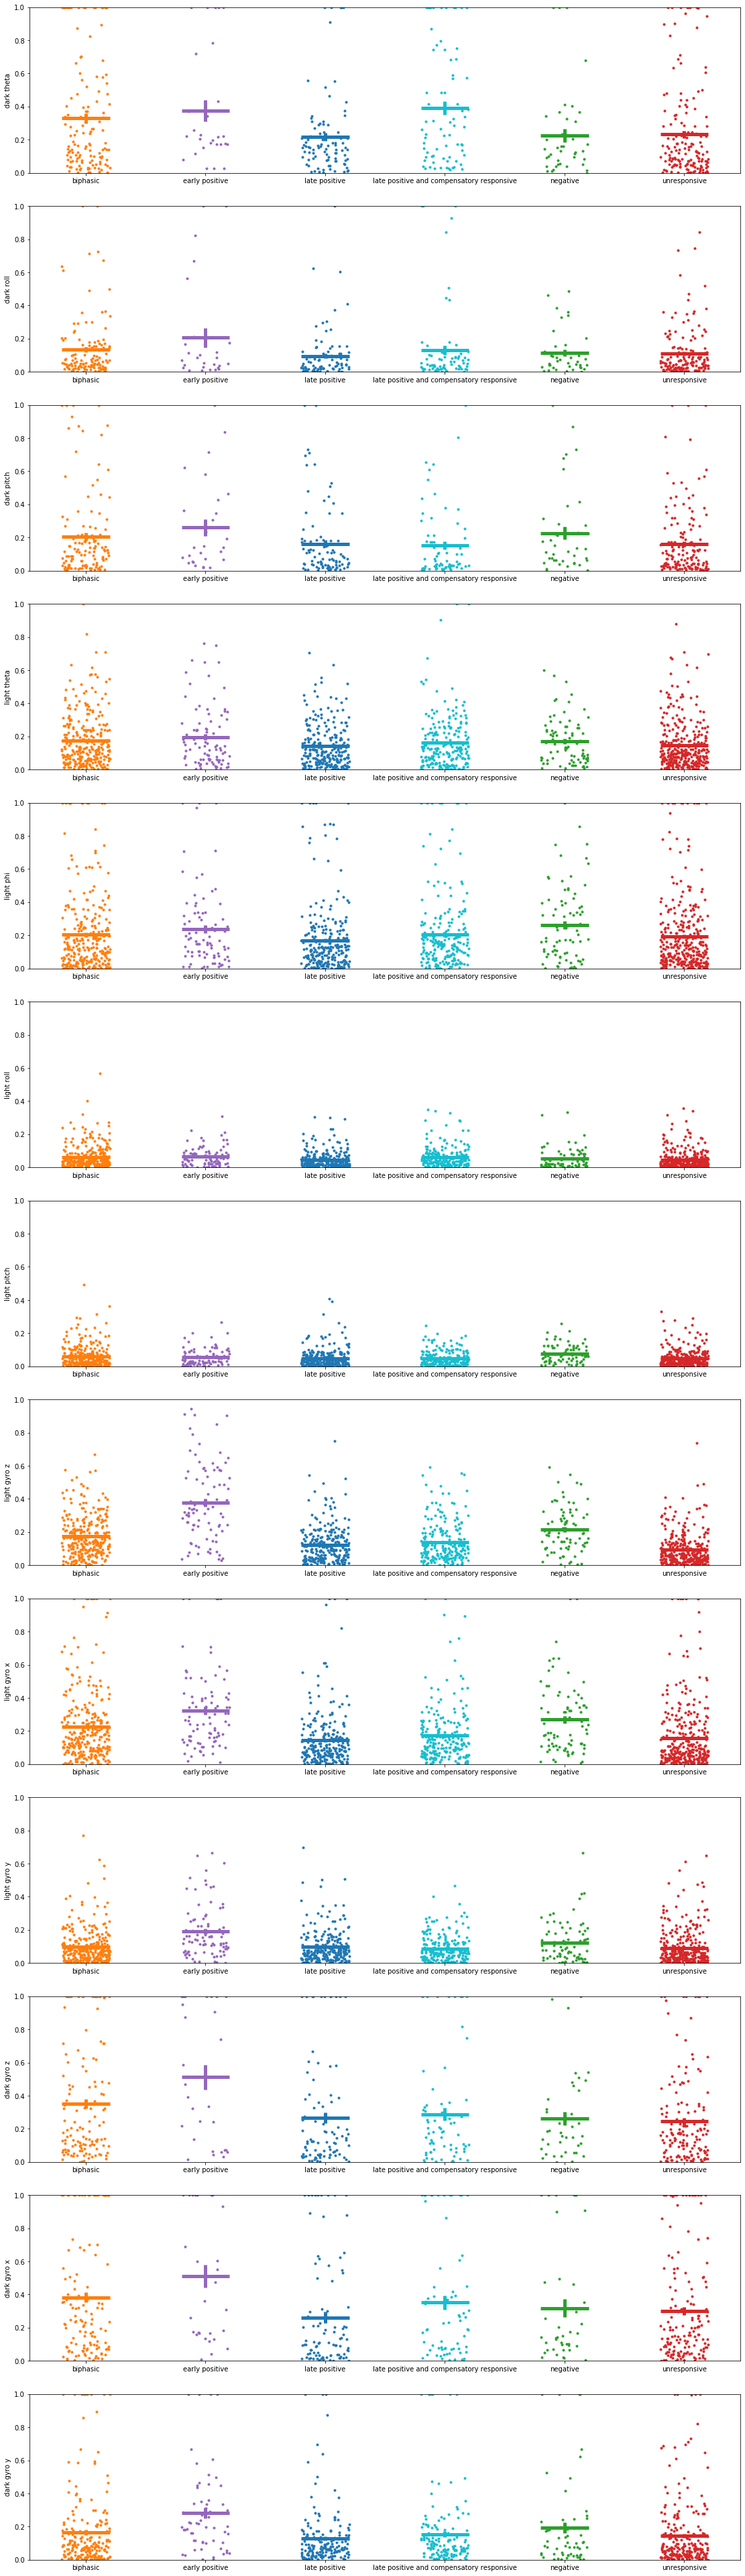

In [27]:
labels = sorted(df1['movement_psth_type'].unique())
plt.subplots(13,1,figsize=(19,70))
for fig_count, prop in enumerate(props):
    ax = plt.subplot(13,1,fig_count+1)
    for label_count, label in enumerate(labels):
        s0 = df1[prop[0]][df1['movement_psth_type']==label].dropna()
        s1 = df1[prop[1]][df1['movement_psth_type']==label].dropna()
        s = np.abs(pd.concat([s0,s1]))
        s_mean = np.nanmean(s)
        stderr = np.nanstd(s) / np.sqrt(np.size(s,0))
        lbound = label_count-0.2; ubound = label_count+0.2
        x_jitter = np.random.uniform(lbound, ubound, np.size(s,0))
        tempcolor = ['tab:orange','tab:purple','tab:blue', 'tab:cyan', 'tab:green', 'tab:red'][label_count]
        plt.plot(x_jitter, np.array(s), '.', color=tempcolor)
        plt.hlines(s_mean, lbound, ubound, color=tempcolor, linewidth=5)
        plt.vlines(label_count, s_mean-stderr, s_mean+stderr, color=tempcolor, linewidth=5)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    plt.ylabel(prop_labels[fig_count])
    plt.ylim([0,1])
#     plt.hlines(0,-2,10,linestyles='dotted', colors='k')
#     plt.xlim([-0.5,5.5])
#     plt.ylim([-1,1])
plt.show()

In [147]:
props1 = [[['fm_dark_spike_rate_vs_theta_modind_neg','fm_dark_spike_rate_vs_theta_modind_pos'],['fm1_spike_rate_vs_theta_modind_neg','fm1_spike_rate_vs_theta_modind_pos']],
        [['fm_dark_spike_rate_vs_roll_modind_neg','fm_dark_spike_rate_vs_roll_modind_pos'],['fm1_spike_rate_vs_roll_modind_neg','fm1_spike_rate_vs_roll_modind_pos']],
         [['fm_dark_spike_rate_vs_pitch_modind_neg','fm_dark_spike_rate_vs_pitch_modind_pos'],['fm1_spike_rate_vs_pitch_modind_neg','fm1_spike_rate_vs_pitch_modind_pos']],
         [['fm_dark_wn_spike_rate_vs_gz_modind_neg','fm_dark_spike_rate_vs_gz_modind_pos'],['fm1_spike_rate_vs_gz_modind_neg','fm1_spike_rate_vs_gz_modind_pos']],
        [['fm_dark_spike_rate_vs_gx_modind_neg','fm_dark_spike_rate_vs_gy_modind_neg'],['fm1_spike_rate_vs_gx_modind_neg','fm1_spike_rate_vs_gx_modind_pos']],
        [['fm_dark_spike_rate_vs_gy_modind_pos','fm1_spike_rate_vs_gy_modind_pos'],['fm1_spike_rate_vs_gy_modind_neg','fm1_spike_rate_vs_gy_modind_pos']]]
prop_labels1 = ['theta','roll','pitch','gyro z','gyro x','gyro y']

In [173]:
from scipy.stats import linregress

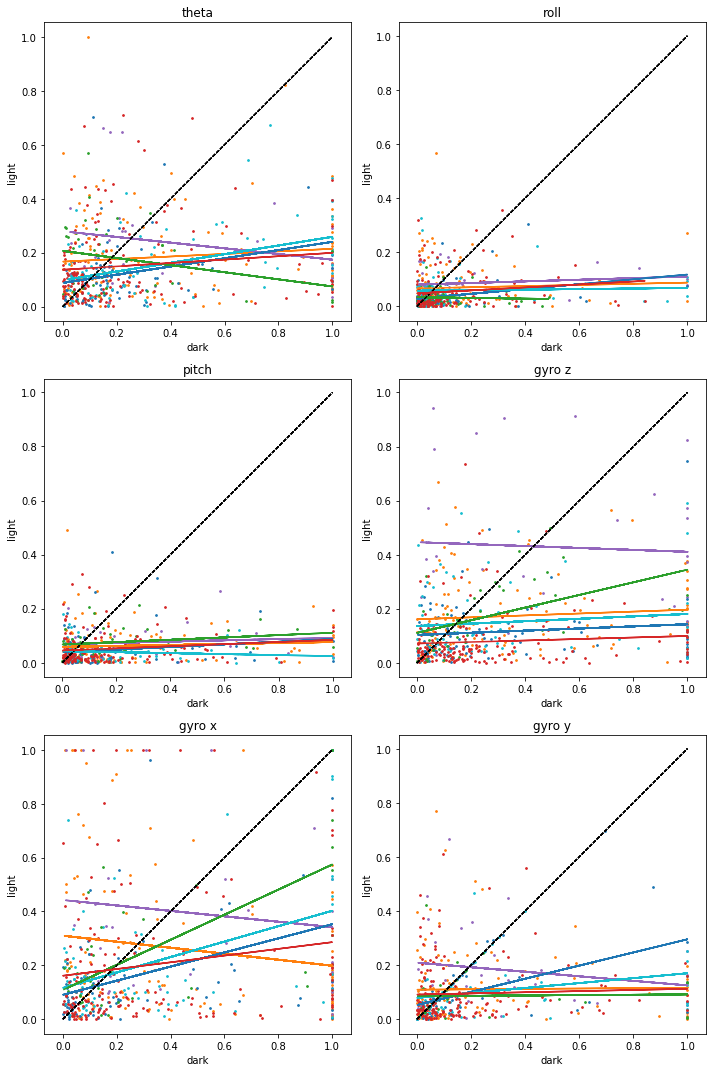

In [175]:
labels = sorted(df1['movement_psth_type'].unique())
plt.subplots(3,2,figsize=(10,15))
for fig_count, prop in enumerate(props1):
    plt.subplot(3,2,fig_count+1)
    for label_count, label in enumerate(labels):
        s = []
        for stim in range(2):
            s0 = df1[prop[stim][0]][df1['movement_psth_type']==label][df1['has_dark']].dropna()
            s1 = df1[prop[stim][1]][df1['movement_psth_type']==label][df1['has_dark']].dropna()
            s.append(pd.concat([s0,s1], join='inner').apply(np.abs).reset_index().drop('index',axis=1))
        s = pd.concat([s[0][~pd.isnull(s[0]) & ~pd.isnull(s[1])].dropna(), s[1][~pd.isnull(s[0]) & ~pd.isnull(s[1])].dropna()], axis=1).dropna()
        tempcolor = ['tab:orange','tab:purple','tab:blue', 'tab:cyan', 'tab:green', 'tab:red'][label_count]
        plt.scatter(s.iloc[:,0],s.iloc[:,1], color=tempcolor, s=3)
        plt.plot([[0,0],[1,1]], 'k--', linewidth=1)
        res = linregress(s.iloc[:,0],s.iloc[:,1])
        plt.plot(x, res.intercept + res.slope*x, color=tempcolor)
        plt.ylabel('light'); plt.xlabel('dark')
        plt.title(prop_labels1[fig_count])
        plt.axis('equal')
plt.tight_layout()

In [149]:
s

0      0
0    0.268  0.484
1    0.079  0.103
2    0.019  0.019
3    0.047  0.074
4    0.014  0.124
..     ...    ...
154  0.045  0.007
155  0.022  0.045
156  0.070  0.022
157  0.002  0.070
158  0.053  0.002

[159 rows x 2 columns]

In [112]:
s[~pd.isnull(s[0]) & ~pd.isnull(s[1])].dropna()#, s[1][~pd.isnull(s[0]) & ~pd.isnull(s[1])].dropna()])

KeyError: 1

In [106]:
s[1][~pd.isnull(s[0]) & ~pd.isnull(s[1])].dropna()

0
0    0.103
1    0.335
2    0.295
3    0.400
4    0.003
..     ...
125  0.136
126  0.023
127  0.389
128  0.111
129  0.194

[130 rows x 1 columns]

In [91]:
~pd.isnull(s[0]) & ~pd.isnull(s[1])

0
0     True
1     True
2     True
3     True
4     True
..     ...
131  False
132  False
133  False
134  False
135  False

[136 rows x 1 columns]

In [81]:
s

0      0
0    0.109  0.103
1    1.000  0.335
2    0.296  0.295
3    0.453  0.400
4    0.519  0.003
..     ...    ...
131    NaN  0.063
132    NaN  0.090
133    NaN  0.043
134    NaN  0.025
135    NaN  0.238

[136 rows x 2 columns]

In [63]:
print(len(s[0]), len(s[1]))

130 136


In [40]:
pd.concat([s0,s1],ignore_index=True)

fm_dark_spike_rate_vs_roll_modind_neg  \
0                                   -0.138   
1                                    0.190   
2                                   -0.041   
3                                   -0.055   
4                                   -0.032   
..                                     ...   
127                                    NaN   
128                                    NaN   
129                                    NaN   
130                                    NaN   
131                                    NaN   

     fm_dark_spike_rate_vs_roll_modind_pos  fm1_spike_rate_vs_roll_modind_neg  \
0                                    0.070                                NaN   
1                                   -0.072                                NaN   
2                                   -0.017                                NaN   
3                                    0.038                                NaN   
4                                    0.011                                NaN   
..                                     ...                                ...   
127                                    NaN                              0.005   
128                                    NaN                              0.007   
129                                    NaN                              0.037   
130                                    NaN                              0.209   
131                                    NaN                             -0.010   

     fm1_spike_rate_vs_roll_modind_pos  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
..                                 ...  
127                             -0.069  
128                             -0.118  
129                             -0.032  
130                              0.267  
131                              0.064  

[132 rows x 4 columns]

In [38]:
print(np.shape(s0), np.shape(s1))

(64, 2) (68, 2)


In [34]:
print(s)

[array([[0.109, 0.264,   nan,   nan],
       [1.   , 1.   ,   nan,   nan],
       [0.296, 0.051,   nan,   nan],
       [0.453, 0.54 ,   nan,   nan],
       [0.519, 0.252,   nan,   nan],
       [0.592, 0.562,   nan,   nan],
       [0.109, 0.094,   nan,   nan],
       [1.   , 1.   ,   nan,   nan],
       [0.37 , 0.43 ,   nan,   nan],
       [0.402, 1.   ,   nan,   nan],
       [0.045, 0.032,   nan,   nan],
       [0.065, 0.258,   nan,   nan],
       [0.102, 0.032,   nan,   nan],
       [0.021, 1.   ,   nan,   nan],
       [0.337, 0.475,   nan,   nan],
       [0.077, 0.349,   nan,   nan],
       [0.581, 0.231,   nan,   nan],
       [0.15 , 1.   ,   nan,   nan],
       [0.081, 0.142,   nan,   nan],
       [0.11 , 0.079,   nan,   nan],
       [0.072, 0.094,   nan,   nan],
       [0.267, 1.   ,   nan,   nan],
       [0.162, 0.149,   nan,   nan],
       [0.011, 0.278,   nan,   nan],
       [0.14 , 0.034,   nan,   nan],
       [0.032, 0.101,   nan,   nan],
       [0.478, 0.125,   nan,   nan],


In [5]:
labels = sorted(df1['movement_psth_type'].unique())
stims = ['norm_deflection_at_pref_direction','norm_deflection_at_pref_direction_comp','norm_deflection_at_opp_direction','norm_deflection_at_opp_direction_comp',
        'dark_gaze_shift_using_light_direction_pref','dark_comp_using_light_direction_pref','dark_gaze_shift_using_light_direction_opp','dark_comp_using_light_direction_opp']
stim_titles = ['pref gaze shift','pref comp','opp gaze shift','opp comp','dark pref gaze shift','dark pref comp','dark opp gaze shift','dark opp comp']

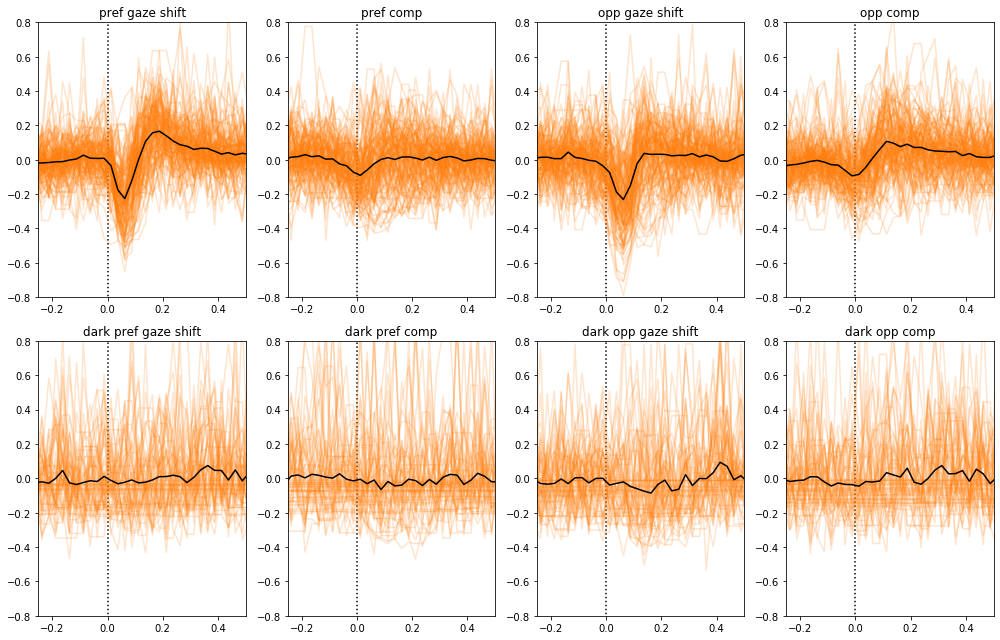

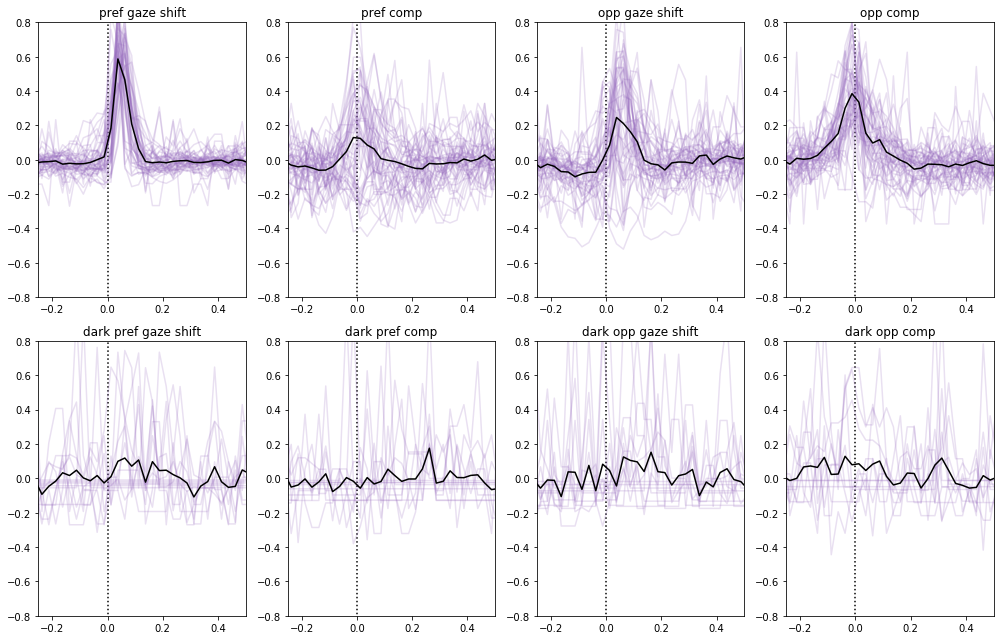

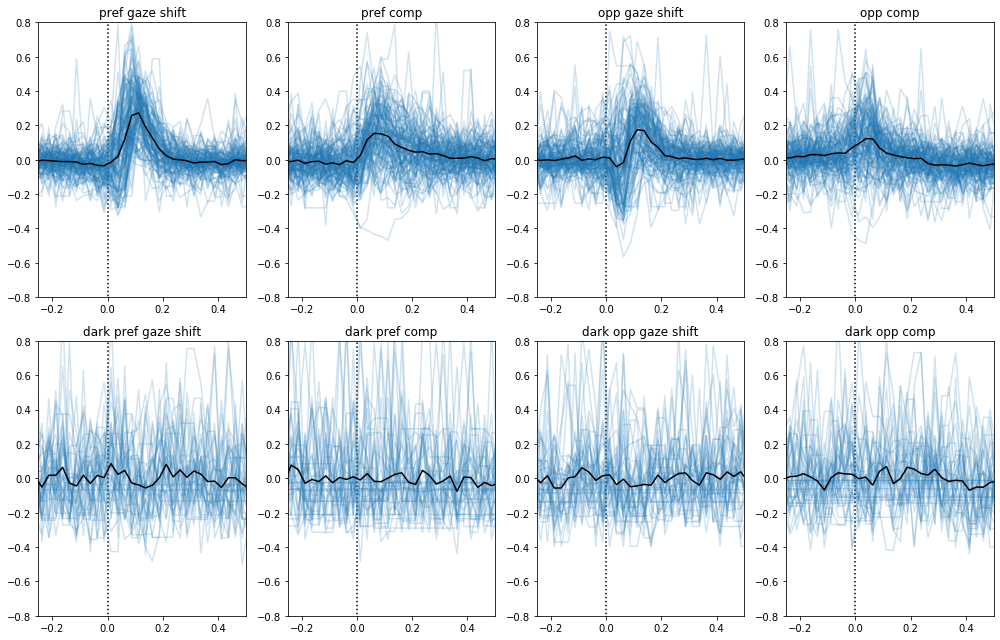

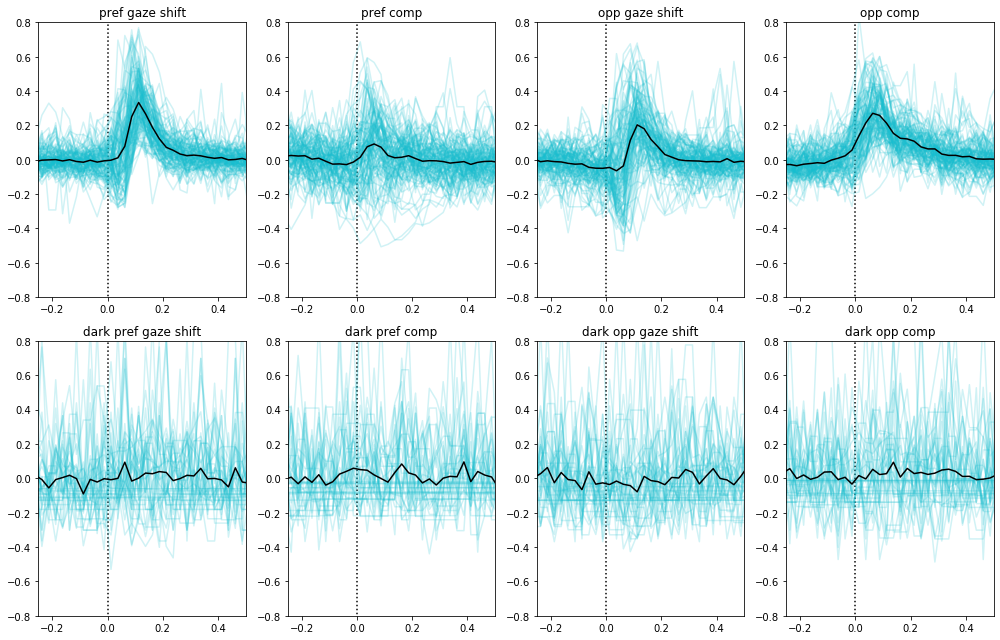

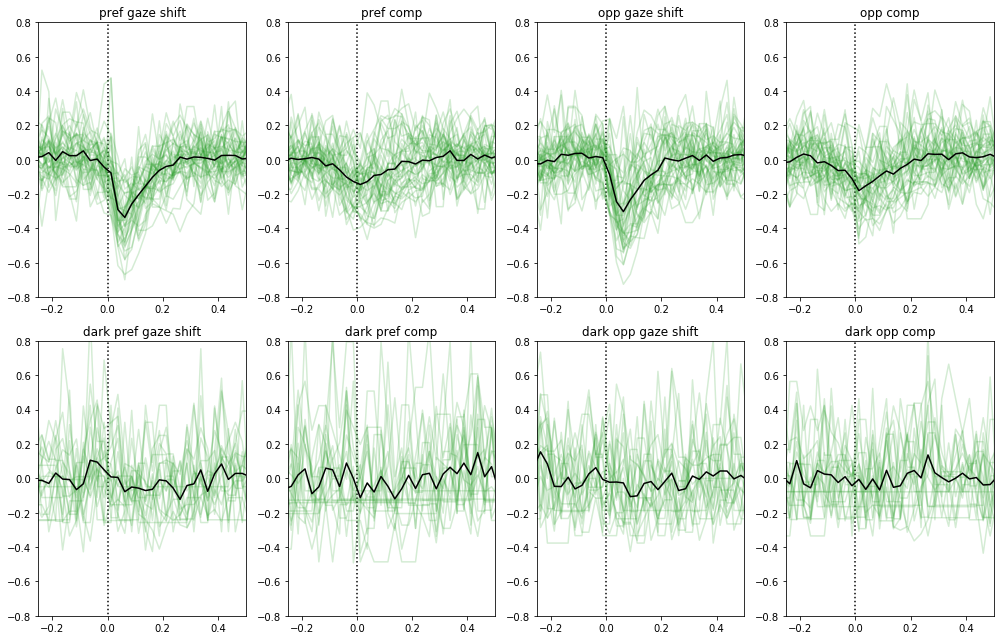

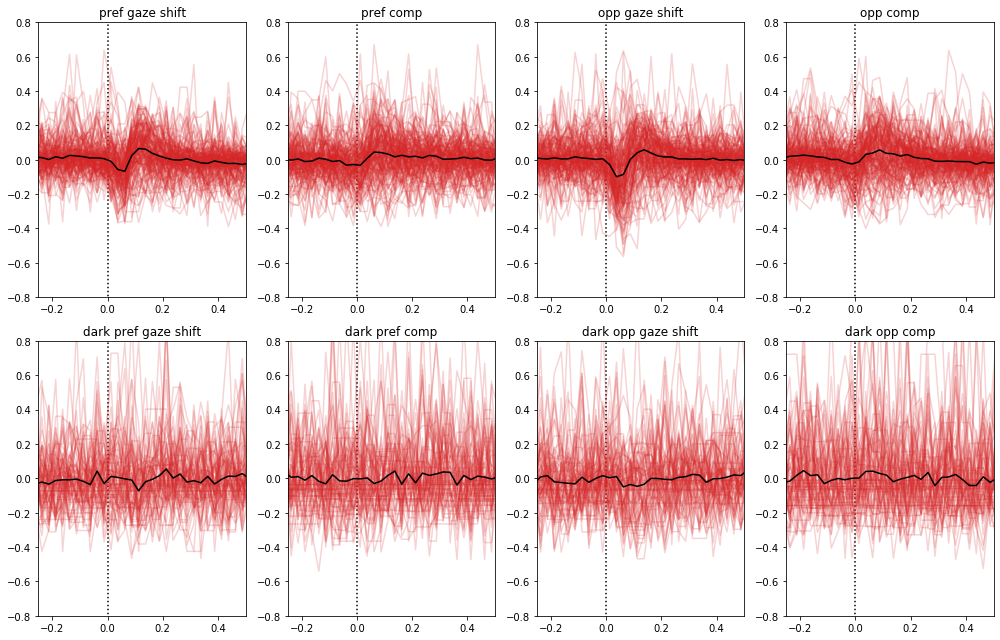

In [22]:
trange = np.arange(-1,1.1,0.025)
for label_count, label in enumerate(labels):
    tempcolor = ['tab:orange','tab:purple','tab:blue', 'tab:cyan', 'tab:green', 'tab:red'][label_count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplots(2,4,figsize=(14,9))
    for stim_count in range(8):
        stim = stims[stim_count]; stim_name = stim_titles[stim_count]
        if 'dark' in stim_name:
            usecluster = cluster[cluster['has_dark']]
        else:
            usecluster = cluster
        plt.subplot(2,4,stim_count+1)
        for ind, row in usecluster.iterrows():
            plt.plot(0.5*(trange[0:-1] + trange[1:]), usecluster.loc[ind, stim], color=tempcolor, alpha=0.2)
        plt.plot(0.5*(trange[0:-1] + trange[1:]), np.nanmean(flatten_series(usecluster[stim]), 0), 'k')
        plt.xlim([-0.25,0.5])
        plt.title(stim_name)
        plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
        plt.ylim([-0.8,0.8])
    plt.tight_layout()
    plt.show()

In [162]:
df1[df1['session']==session]

level_0  index  Amplitude  ContamPct KSLabel         amp  ch  depth  \
16       16     27     1213.9        4.0    good   63.551121  16    375   
17       17     33     1296.1        4.0    good  107.391724  23    200   
18       18     40     2241.5        1.4    good   95.084503  28     75   
19       19     41      821.0        4.7    good   62.562588  28     75   
20       20     57     1208.9        4.9    good   67.465881  53    250   
21       21     59     1292.5        0.9    good   65.060577  53    250   
22       22     64     1437.9        4.9    good   71.291527  58    125   

           fr group  ...                  norm_deflection_at_pref_direction  \
16  17.498197  good  ...  [-0.021650290767757777, 0.021785531584610968, ...   
17   9.156011  good  ...  [-0.012162937464147042, 0.03609103078981894, -...   
18   7.391204  good  ...  [0.18123777159921176, 0.09576768612912792, 0.1...   
19   7.358973  good  ...  [-0.04209406284264899, -0.0668651990838974, -0...   
20  20.644625  good  ...  [0.013266319312936604, 0.01793921650919851, 0....   
21  10.674432  good  ...  [-0.035940256219905986, 0.004760704775007815, ...   
22   6.522051  good  ...  [0.055429294129949055, 0.03017278268559221, -0...   

               norm_deflection_at_pref_direction_comp gauss_clust  \
16  [-0.04363549142973157, -0.006882045794201186, ...           3   
17  [-0.07756826881085123, -0.04345313021810078, -...           0   
18  [-0.06837933745564288, -0.14245341152971666, -...           4   
19  [-0.01260886358256202, -0.018813620562913608, ...           0   
20  [0.022401835471418115, -0.009497632870775725, ...           3   
21  [0.0758828605446267, 0.07134976897617593, 0.05...           0   
22  [-0.05044659005537189, -0.03543504271126096, -...           0   

   movement_psth_type_simple  early_comp_responsive late_comp_responsive  \
16              unresponsive                    NaN                  NaN   
17                      late                    NaN                 True   
18                  negative                    NaN                  NaN   
19                      late                    NaN                False   
20              unresponsive                    NaN                  NaN   
21                      late                    NaN                False   
22                      late                    NaN                 True   

                           movement_psth_type best_direction best_orientation  \
16                               unresponsive          315.0            135.0   
17  late positive and compensatory responsive           45.0            225.0   
18                                   negative          180.0              0.0   
19                              late positive          225.0             45.0   
20                               unresponsive          180.0              0.0   
21                              late positive          180.0              0.0   
22  late positive and compensatory responsive          135.0            315.0   

   has_dark  
16    False  
17    False  
18    False  
19    False  
20    False  
21    False  
22    False  

[7 rows x 547 columns]

In [206]:
base = 'fm1'
movement = 'eye_gaze_shifting'
sessions = sorted([i for i in df1['session'].unique() if type(i) != float])
session = sessions[1]
trange = np.arange(-1,1.1,0.025)
row = df1[df1['session']==session][df1['index']==27]

In [207]:
eyeT = row[base+'_eyeT'].iloc[0].values
dEye = row[base+'_dEye'].iloc[0]
dhead = row[base+'_dHead'].iloc[0]
dgz = dEye + dhead(eyeT[0:-1])

sthresh = 5
rightsacc = eyeT[(np.append(dEye,0)>sthresh) & (np.append(dgz,0)>sthresh)]
leftsacc = eyeT[(np.append(dEye,0)<-sthresh) & (np.append(dgz,0)<-sthresh)]

deye_mov_right = np.zeros([len(rightsacc), len(trange)-1]); deye_mov_left = np.zeros([len(leftsacc), len(trange)-1])

dhead = dhead(eyeT[0:-1])

for i, sind in enumerate(rightsacc):
    hist, edges = np.histogram(row['fm1_spikeT'].iloc[0]-sind, trange)
    deye_mov_right[i] = hist / (rightsacc.size*np.diff(trange))
for i, sind in enumerate(leftsacc):
    hist, edges = np.histogram(row['fm1_spikeT'].iloc[0]-sind, trange)
    deye_mov_left[i] = hist / (leftsacc.size*np.diff(trange))

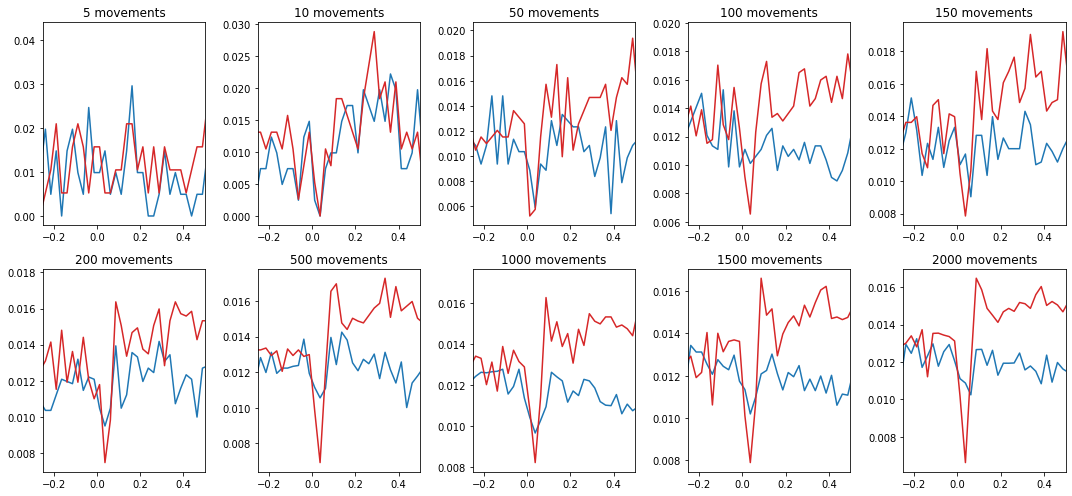

In [208]:
plt.subplots(2,5,figsize=(15,7))
for count, movecount in enumerate([5,10,50,100,150,200,500,1000,1500,2000]):
    use_left_inds = sorted(np.random.randint(0,np.size(deye_mov_left,0),movecount))
    use_right_inds = sorted(np.random.randint(0,np.size(deye_mov_right,0),movecount))
    plt.subplot(2,5,count+1)
    plt.plot(0.5*(trange[0:-1] + trange[1:]), np.nanmean(deye_mov_left[use_left_inds],0), color='tab:blue')
    plt.plot(0.5*(trange[0:-1] + trange[1:]), np.nanmean(deye_mov_right[use_right_inds],0), color='tab:red')
    plt.title(str(movecount)+' movements')
    plt.xlim([-0.25,0.5])
plt.tight_layout()

In [8]:
movement_count_dict = dict()
for base in ['fm1','fm_dark']:
    for movement in ['eye_gaze_shifting', 'eye_comp']:
        sessions = [i for i in df1['session'].unique() if type(i) != float]
        n_sessions = len(df1['session'].unique())
        trange = np.arange(-1,1.1,0.025)
        for session_num, session_name in enumerate(sessions):
            row = df1[df1['session']==session_name].iloc[0]

            if type(row[base+'_eyeT']) != float and type(row[base+'_dEye']) != float and type(row[base+'_dHead']) != float:

                eyeT = row[base+'_eyeT'].values
                dEye = row[base+'_dEye']
                dhead = row[base+'_dHead']
                dgz = dEye + dhead(eyeT[0:-1])

                if movement=='eye_gaze_shifting':
                    sthresh = 5
                    rightsacc = eyeT[(np.append(dEye,0)>sthresh) & (np.append(dgz,0)>sthresh)]
                    leftsacc = eyeT[(np.append(dEye,0)<-sthresh) & (np.append(dgz,0)<-sthresh)]
                elif movement=='eye_comp':
                    sthresh = 3
                    rightsacc = eyeT[(np.append(dEye,0)>sthresh) & (np.append(dgz,0)<1)]
                    leftsacc = eyeT[(np.append(dEye,0)<-sthresh) & (np.append(dgz,0)>-1)]
                elif movement=='head_gaze_shifting':
                    sthresh = 3
                    rightsacc = eyeT[(np.append(dhead(eyeT[0:-1]),0)>sthresh) & (np.append(dgz,0)>sthresh)]
                    leftsacc = eyeT[(np.append(dhead(eyeT[0:-1]),0)<-sthresh) & (np.append(dgz,0)<-sthresh)]
                elif movement=='head_comp':
                    sthresh = 3
                    rightsacc = eyeT[(np.append(dhead(eyeT[0:-1]),0)>sthresh) & (np.append(dgz,0)<1)]
                    leftsacc = eyeT[(np.append(dhead(eyeT[0:-1]),0)<-sthresh) & (np.append(dgz,0)>-1)]

                deye_mov_right = np.zeros([len(rightsacc), len(trange)]); deye_mov_left = np.zeros([len(leftsacc), len(trange)])
                dgz_mov_right = np.zeros([len(rightsacc), len(trange)]); dgz_mov_left = np.zeros([len(leftsacc), len(trange)])
                dhead_mov_right = np.zeros([len(rightsacc), len(trange)]); dhead_mov_left = np.zeros([len(leftsacc), len(trange)])

                dhead = dhead(eyeT[0:-1])

                for sind in range(len(rightsacc)):
                    s = rightsacc[sind]
                    mov_ind = np.where([eyeT==find_nearest(eyeT, s)])[1]
                    trange_inds = list(mov_ind + np.arange(-42,42))
                    if np.max(trange_inds) < len(dEye):
                        deye_mov_right[sind,:] = dEye[np.array(trange_inds)]
                    if np.max(trange_inds) < len(dgz):
                        dgz_mov_right[sind,:] = dgz[np.array(trange_inds)]
                    if np.max(trange_inds) < len(dhead):
                        dhead_mov_right[sind,:] = dhead[np.array(trange_inds)]
                for sind in range(len(leftsacc)):
                    s = leftsacc[sind]
                    mov_ind = np.where([eyeT==find_nearest(eyeT, s)])[1]
                    trange_inds = list(mov_ind + np.arange(-42,42))
                    if np.max(trange_inds) < len(dEye):
                        deye_mov_left[sind,:] = dEye[np.array(trange_inds)]
                    if np.max(trange_inds) < len(dgz):
                        dgz_mov_left[sind,:] = dgz[np.array(trange_inds)]
                    if np.max(trange_inds) < len(dhead):
                        dhead_mov_left[sind,:] = dhead[np.array(trange_inds)]

                movement_count_dict.setdefault(base, {}).setdefault(movement, {}).setdefault(session_name, {})['right'] = len(rightsacc)
                movement_count_dict.setdefault(base, {}).setdefault(movement, {}).setdefault(session_name, {})['left'] = len(leftsacc)

In [10]:
right_gaze = [val['right'] for key,val in movement_count_dict['fm1']['eye_gaze_shifting'].items()]
left_gaze = [val['left'] for key,val in movement_count_dict['fm1']['eye_gaze_shifting'].items()]

right_comp = [val['right'] for key,val in movement_count_dict['fm1']['eye_comp'].items()]
left_comp = [val['left'] for key,val in movement_count_dict['fm1']['eye_comp'].items()]

right_gaze_dark = [val['right'] for key,val in movement_count_dict['fm_dark']['eye_gaze_shifting'].items()]
left_gaze_dark = [val['left'] for key,val in movement_count_dict['fm_dark']['eye_gaze_shifting'].items()]

right_comp_dark = [val['right'] for key,val in movement_count_dict['fm_dark']['eye_comp'].items()]
left_comp_dark = [val['left'] for key,val in movement_count_dict['fm_dark']['eye_comp'].items()]

Text(0, 0.5, 'number of eye movements')

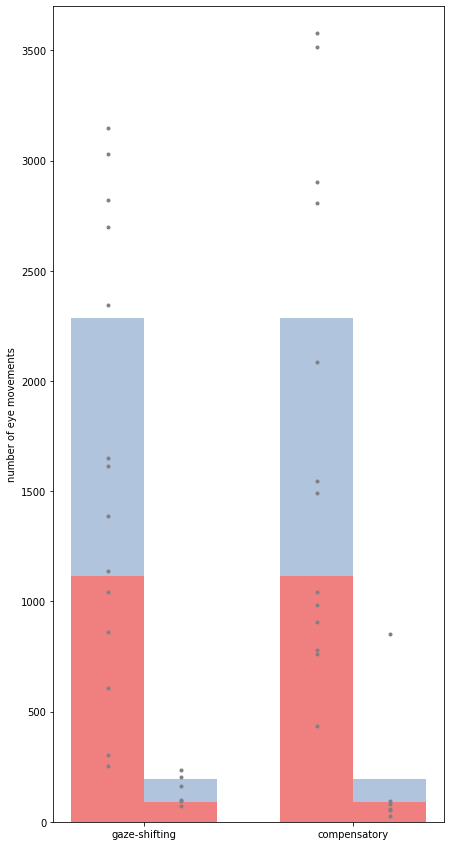

In [47]:
x = np.arange(len(['gaze-shifting', 'compensatory']))
width = 0.35

fig, ax = plt.subplots(figsize=(7,15))

ax.bar(x - width/2, np.mean(right_gaze), width, color='lightcoral')
ax.bar(x - width/2, np.mean(left_gaze), width, bottom=np.mean(right_gaze), color='lightsteelblue')
plt.plot(np.ones(len(right_gaze))*(0 - width/2), np.add(right_gaze, left_gaze), '.', color='gray')

ax.bar(x + width/2, np.mean(right_gaze_dark), width, color='lightcoral')
ax.bar(x + width/2, np.mean(left_gaze_dark), width, bottom=np.mean(right_gaze_dark), color='lightsteelblue')
plt.plot(np.ones(len(right_gaze_dark))*(0 + width/2), np.add(right_gaze_dark, left_gaze_dark), '.', color='gray')

ax.bar(x - width/2, np.mean(right_comp), width, color='lightcoral')
ax.bar(x - width/2, np.mean(left_comp), width, bottom=np.mean(right_comp), color='lightsteelblue')
plt.plot(np.ones(len(right_comp))*(1 - width/2), np.add(right_comp, left_comp), '.', color='gray')

ax.bar(x + width/2, np.mean(right_comp_dark), width, color='lightcoral')
ax.bar(x + width/2, np.mean(left_comp_dark), width, bottom=np.mean(right_comp_dark), color='lightsteelblue')
plt.plot(np.ones(len(right_comp_dark))*(1 + width/2), np.add(right_comp_dark, left_comp_dark), '.', color='gray')

ax.set_xticks(x)
ax.set_xticklabels(['gaze-shifting', 'compensatory'])
plt.ylim([0,3700]); plt.ylabel('number of eye movements')

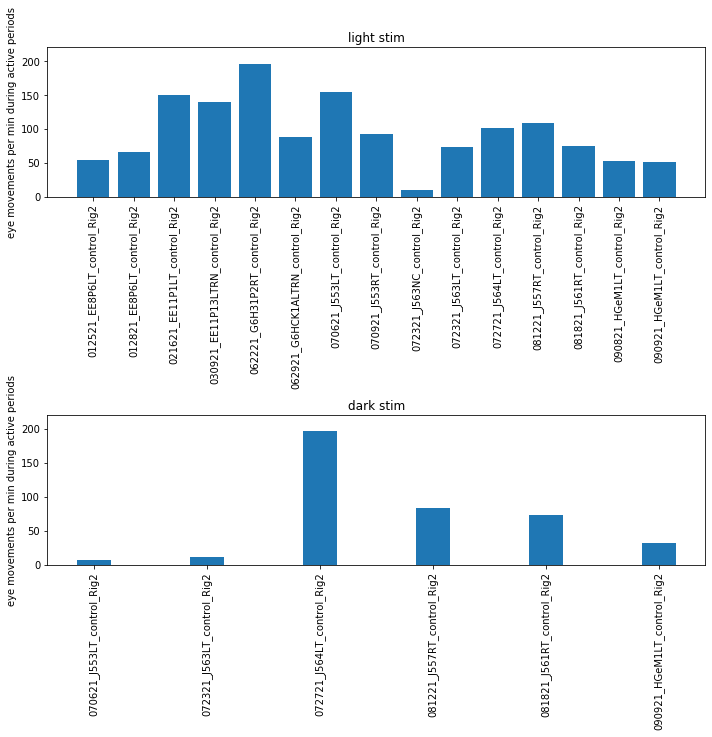

In [230]:
fig = plt.subplots(2,1,figsize=(10,10))
ax = plt.subplot(2,1,1)
ax.bar(light_session_names, np.add(right_gaze, left_gaze) / light_active_min)
ax.set_xticklabels(light_session_names, rotation=90); plt.ylim([0,220]); plt.ylabel('eye movements per min during active periods'); plt.title('light stim')
ax = plt.subplot(2,1,2)
ax.bar(dark_session_names, np.add(right_gaze_dark, left_gaze_dark) / dark_active_min, width=0.3)
ax.set_xticklabels(dark_session_names, rotation=90); plt.ylim([0,220]); plt.ylabel('eye movements per min during active periods'); plt.title('dark stim')
plt.tight_layout()

In [42]:
print(np.shape(np.ones(len(right_gaze))), np.shape((x[0] - width/2)), np.shape(np.add(right_gaze, left_gaze)))

(15,) () (15,)


In [5]:
trange = np.arange(-1,1.1,0.025)

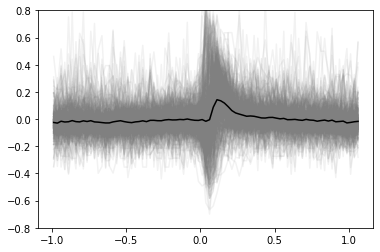

In [19]:
for ind, row in df1[df1['movement_psth_type_simple']!='unresponsive'].iterrows():
    plt.plot(0.5*(trange[0:-1] + trange[1:]), row['norm_deflection_at_pref_direction'], color='gray', alpha=0.1)
plt.ylim([-0.8,0.8])
plt.plot(0.5*(trange[0:-1] + trange[1:]), np.nanmean(flatten_series(df1['norm_deflection_at_pref_direction'][df1['movement_psth_type_simple']!='unresponsive']),0), 'k')

In [48]:
active_time_by_session = dict()
dark_len = []; light_len = []
sessions = [x for x in df1['session'].unique() if str(x) != 'nan']
for session in sessions:
    session_data = df1[df1['session']==session]
    # find active times
    model_dt = 0.025
    if type(session_data['fm1_eyeT'].iloc[0]) != float:
        # light setup
        fm_light_eyeT = session_data['fm1_eyeT'].iloc[0].values
        fm_light_gz = session_data['fm1_gz'].iloc[0]
        fm_light_accT = session_data['fm1_accT'].iloc[0]
        light_model_t = np.arange(0,np.nanmax(fm_light_eyeT),model_dt)
        light_model_gz = interp1d(fm_light_accT,(fm_light_gz-np.mean(fm_light_gz))*7.5,bounds_error=False)(light_model_t)
        light_model_active = np.convolve(np.abs(light_model_gz),np.ones(np.int(1/model_dt)),'same')
        light_active = light_model_active>40
        
        active_time_by_session.setdefault('light', {})[session] = np.sum(light_active) / len(light_active)
        light_len.append(len(light_active))

    if type(session_data['fm_dark_eyeT'].iloc[0]) != float:

        # dark setup
        fm_dark_eyeT = session_data['fm_dark_eyeT'].iloc[0].values
        fm_dark_gz = session_data['fm_dark_gz'].iloc[0]
        fm_dark_accT = session_data['fm_dark_accT'].iloc[0]
        dark_model_t = np.arange(0,np.nanmax(fm_dark_eyeT),model_dt)
        dark_model_gz = interp1d(fm_dark_accT,(fm_dark_gz-np.mean(fm_dark_gz))*7.5,bounds_error=False)(dark_model_t)
        dark_model_active = np.convolve(np.abs(dark_model_gz),np.ones(np.int(1/model_dt)),'same')
        dark_active = dark_model_active>40
        
        active_time_by_session.setdefault('dark', {})[session] = np.sum(dark_active) / len(dark_active)
        dark_len.append(len(dark_active))

Text(0, 0.5, 'frac active time')

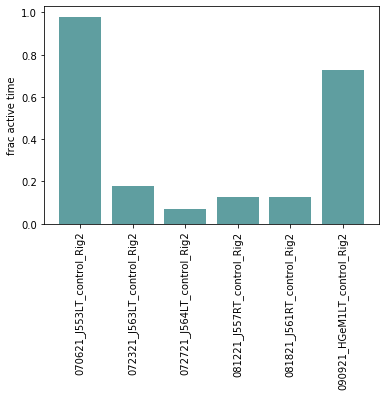

In [232]:
dark_active_times = [active_frac for session, active_frac in active_time_by_session['dark'].items()]
dark_session_names = [session for session, active_frac in active_time_by_session['dark'].items()]
fig, ax = plt.subplots(1,1)
plt.bar(np.arange(0, len(dark_session_names)), dark_active_times, color='cadetblue')
ax.set_xticks(np.arange(0, len(dark_session_names)))
ax.set_xticklabels(dark_session_names, rotation=90)
plt.ylabel('frac active time')

(0, 1)

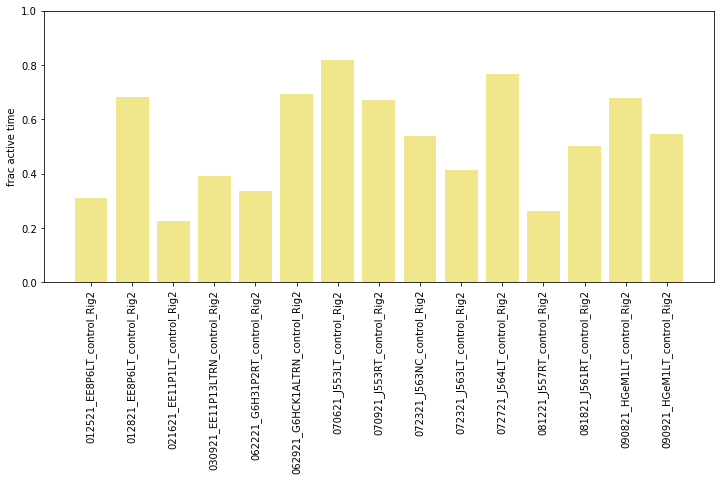

In [234]:
dark_active_times = [active_frac for session, active_frac in active_time_by_session['light'].items()]
dark_session_names = [session for session, active_frac in active_time_by_session['light'].items()]
fig, ax = plt.subplots(1,1, figsize=(12,5))
plt.bar(np.arange(0, len(dark_session_names)), dark_active_times, color='khaki')
ax.set_xticks(np.arange(len(dark_session_names)))
ax.set_xticklabels(dark_session_names, rotation=90)
plt.ylabel('frac active time'); plt.ylim([0,1])

Text(0, 0.5, 'recording time (min)')

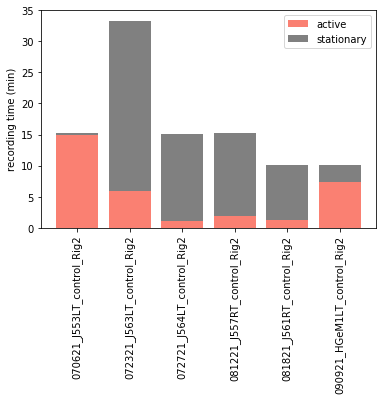

In [235]:
total_min = [(i*model_dt)/60 for i in dark_len]
frac_active = [active_frac for session, active_frac in active_time_by_session['dark'].items()]
dark_active_min = [total_min[i] * frac_active[i] for i in range(len(total_min))]
dark_stationary_min = [total_min[i] * (1-frac_active[i]) for i in range(len(total_min))]
dark_session_names = [session for session, active_frac in active_time_by_session['dark'].items()]
fig, ax = plt.subplots(1,1)
plt.bar(np.arange(0, len(dark_session_names)), dark_active_min, color='salmon', label='active')
plt.bar(np.arange(0, len(dark_session_names)), dark_stationary_min, bottom=dark_active_min, color='gray', label='stationary')
ax.set_xticks(np.arange(len(dark_session_names)))
ax.set_xticklabels(dark_session_names, rotation=90)
plt.legend()
plt.ylabel('recording time (min)')

In [236]:
total_min = [(i*model_dt)/60 for i in light_len]
frac_active = [active_frac for session, active_frac in active_time_by_session['light'].items()]
light_active_min = [total_min[i] * frac_active[i] for i in range(len(total_min))]
light_stationary_min = [total_min[i] * (1-frac_active[i]) for i in range(len(total_min))]

In [237]:
light_session_names = [session for session, active_frac in active_time_by_session['light'].items()]

Text(0, 0.5, 'recording time (min)')

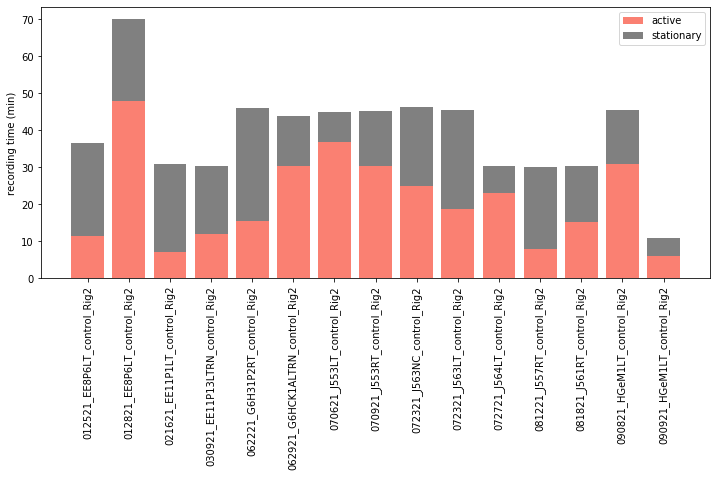

In [239]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
plt.bar(np.arange(0, len(light_session_names)), light_active_min, color='salmon', label='active')
plt.bar(np.arange(0, len(light_session_names)), light_stationary_min, bottom=light_active_min, color='gray', label='stationary')
ax.set_xticks(np.arange(len(light_session_names)))
ax.set_xticklabels(light_session_names, rotation=90)
plt.legend()
plt.ylabel('recording time (min)')

Text(0, 0.5, 'fraction of time spent active')

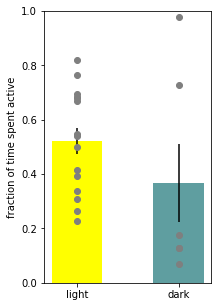

In [35]:
light = np.array([val for key,val in active_time_by_session['light'].items()])
light_err = np.std(light) / np.sqrt(len(light))
dark = np.array([val for key,val in active_time_by_session['dark'].items()])
dark_err = np.std(dark) / np.sqrt(len(dark))
fig, ax = plt.subplots(1,1,figsize=(3,5))
plt.bar(0, np.mean(light), yerr=light_err, width=0.5, color='yellow')
plt.plot(np.zeros(len(light)), light, 'o', color='tab:gray')
plt.bar(1, np.mean(dark), yerr=dark_err, width=0.5, color='cadetblue')
plt.plot(np.ones(len(dark)), dark, 'o', color='tab:gray')
ax.set_xticks([0,1])
ax.set_xticklabels(['light','dark'])
plt.ylim([0,1])
plt.ylabel('fraction of time spent active')

In [219]:
late = flatten_series(df1['norm_deflection_at_opp_direction_comp'][df1['movement_psth_type_simple']=='late'])
late_cluster_km_labels = KMeans(n_clusters=2).fit(late).labels_

In [45]:
comp_responsive_late_cluster

0

In [48]:
np.shape(df1)

(636, 547)

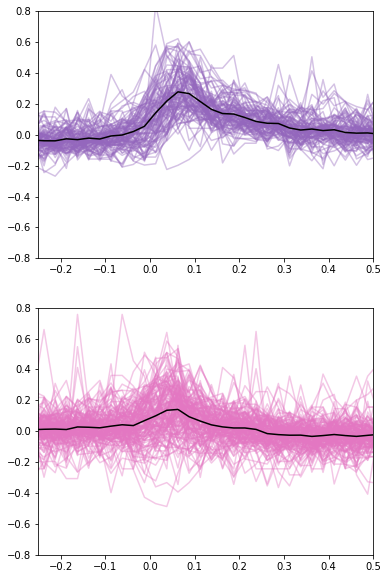

In [220]:
late0mean = np.nanmean(late[late_cluster_km_labels==0], 0)
late1mean = np.nanmean(late[late_cluster_km_labels==1], 0)
comp_responsive_late_cluster = np.argmax([(np.max(np.abs(late0mean))-np.mean(late0mean)) / np.std(late0mean), (np.max(np.abs(late1mean))-np.mean(late1mean)) / np.std(late1mean)])
trange = np.arange(-1,1.1,0.025)
plt.subplots(2,1,figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(0.5*(trange[0:-1] + trange[1:]), late[late_cluster_km_labels==0].T, 'tab:purple', alpha=0.4)
plt.ylim([-0.8,0.8]); plt.xlim([-0.25,0.5])
plt.plot(0.5*(trange[0:-1] + trange[1:]), late0mean, 'k')
plt.subplot(2,1,2)
plt.plot(0.5*(trange[0:-1] + trange[1:]), late[late_cluster_km_labels==1].T, 'tab:pink', alpha=0.4)
plt.ylim([-0.8,0.8]); plt.xlim([-0.25,0.5])
plt.plot(0.5*(trange[0:-1] + trange[1:]), late1mean, 'k')

In [209]:
### waveform clustering figures
for ind, row in df1.iterrows():
    # direction preference
    left_deflection = row['fm1_downsacc_avg_gaze_shift_dEye']
    right_deflection = row['fm1_upsacc_avg_gaze_shift_dEye']
    left_right_zscores = [(np.max(np.abs(left_deflection))-np.mean(left_deflection)) / np.std(left_deflection), (np.max(np.abs(right_deflection))-np.mean(right_deflection)) / np.std(right_deflection)]
    left_right_index = np.argmax(np.abs(left_right_zscores))
    saccade_direction_pref = ['L','R'][left_right_index]
    df1.at[ind, 'gaze_shift_direction_pref'] = saccade_direction_pref; df1.at[ind, 'gaze_shift_direction_pref_ind'] = left_right_index
    # direction preference for compensatory movements
    left_deflection = row['fm1_downsacc_avg_comp_dEye']
    right_deflection = row['fm1_upsacc_avg_comp_dEye']
    left_right_zscores = [(np.max(np.abs(left_deflection))-np.mean(left_deflection)) / np.std(left_deflection), (np.max(np.abs(right_deflection))-np.mean(right_deflection)) / np.std(right_deflection)]
    left_right_index = np.argmax(np.abs(left_right_zscores))
    saccade_direction_pref = ['L','R'][left_right_index]
    df1.at[ind, 'comp_direction_pref'] = saccade_direction_pref; df1.at[ind, 'comp_direction_pref_ind'] = left_right_index
for ind, row in df1.iterrows():
    # more compensatory or more gaze-shifting?
    comp_deflection = [row['fm1_downsacc_avg_comp_dEye'],row['fm1_upsacc_avg_comp_dEye']][int(row['comp_direction_pref_ind'])]
    gazeshift_deflection = [row['fm1_downsacc_avg_gaze_shift_dEye'],row['fm1_upsacc_avg_gaze_shift_dEye']][int(row['gaze_shift_direction_pref_ind'])]
    comp_gazeshift_zscores = [(np.max(np.abs(comp_deflection))-np.mean(comp_deflection)) / np.std(comp_deflection), (np.max(np.abs(gazeshift_deflection))-np.mean(gazeshift_deflection)) / np.std(gazeshift_deflection)]
    comp_gazeshift_index = np.argmax(np.abs(comp_gazeshift_zscores))
    comp_gazeshift_pref = ['comp','gaze_shift'][comp_gazeshift_index]
    df1.at[ind, 'comp_gazeshift_pref'] = comp_gazeshift_pref
df1['dark_gaze_shift_using_light_direction_pref'] = np.array(np.nan).astype(object)
df1['dark_copm_using_light_direction_pref'] = np.array(np.nan).astype(object)
for ind, row in df1.iterrows():
    deflection_at_pref_direction = [row['fm1_downsacc_avg_gaze_shift_dEye'],row['fm1_upsacc_avg_gaze_shift_dEye']][int(row['gaze_shift_direction_pref_ind'])]
    norm_deflection = (deflection_at_pref_direction-np.nanmean(deflection_at_pref_direction)) / np.nanmax(np.abs(deflection_at_pref_direction))
    df1.at[ind, 'norm_deflection_at_pref_direction'] = norm_deflection.astype(object)
    deflection_at_pref_direction = [row['fm1_downsacc_avg_comp_dEye'],row['fm1_upsacc_avg_comp_dEye']][int(row['gaze_shift_direction_pref_ind'])]
    norm_comp_deflection = (deflection_at_pref_direction-np.nanmean(deflection_at_pref_direction)) / np.nanmax(np.abs(deflection_at_pref_direction))
    df1.at[ind, 'norm_deflection_at_pref_direction_comp'] = norm_comp_deflection.astype(object)
    dark_gaze_shift = [row['fm_dark_downsacc_avg_gaze_shift_dEye'],row['fm_dark_upsacc_avg_gaze_shift_dEye']][int(row['gaze_shift_direction_pref_ind'])]
    dark_gaze_shift_norm = ((dark_gaze_shift-np.nanmean(dark_gaze_shift)) / np.nanmax(np.abs(dark_gaze_shift)))
    dark_comp = [row['fm1_downsacc_avg_comp_dEye'],row['fm1_upsacc_avg_comp_dEye']][int(row['gaze_shift_direction_pref_ind'])]
    dark_comp_norm = ((dark_comp-np.nanmean(dark_comp)) / np.nanmax(np.abs(dark_comp)))
    
    deflection_at_pref_direction = [row['fm1_downsacc_avg_gaze_shift_dEye'],row['fm1_upsacc_avg_gaze_shift_dEye']][1-int(row['gaze_shift_direction_pref_ind'])]
    norm_deflection = (deflection_at_pref_direction-np.nanmean(deflection_at_pref_direction)) / np.nanmax(np.abs(deflection_at_pref_direction))
    df1.at[ind, 'norm_deflection_at_opp_direction'] = norm_deflection.astype(object)
    deflection_at_pref_direction = [row['fm1_downsacc_avg_comp_dEye'],row['fm1_upsacc_avg_comp_dEye']][1-int(row['gaze_shift_direction_pref_ind'])]
    norm_comp_deflection = (deflection_at_pref_direction-np.nanmean(deflection_at_pref_direction)) / np.nanmax(np.abs(deflection_at_pref_direction))
    df1.at[ind, 'norm_deflection_at_opp_direction_comp'] = norm_comp_deflection.astype(object)
    
    if type(dark_comp_norm) != float and type(dark_gaze_shift_norm) != float:
        df1.at[ind, 'dark_gaze_shift_using_light_direction_pref'] = dark_gaze_shift_norm.astype(object)
        df1.at[ind, 'dark_comp_using_light_direction_pref'] = dark_comp_norm.astype(object)

In [8]:
norm_deflection = flatten_series(df1['norm_deflection_at_pref_direction'])

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

visualizing with pca


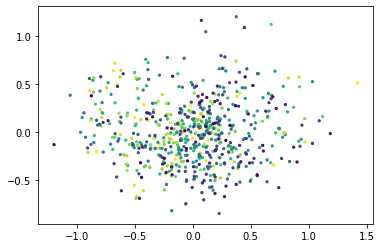

In [13]:
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(norm_deflection)
print('visualizing with pca')
reduced_data = PCA(n_components=2).fit_transform(norm_deflection)
h = .02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = agg.labels_
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=Z,s=5)

In [8]:
df1['gauss_clust'] = Z

In [9]:
bluepatch = mpatches.Patch(color='g', label='inhibitory')
greenpatch = mpatches.Patch(color='b', label='excitatory')

plotting clusters


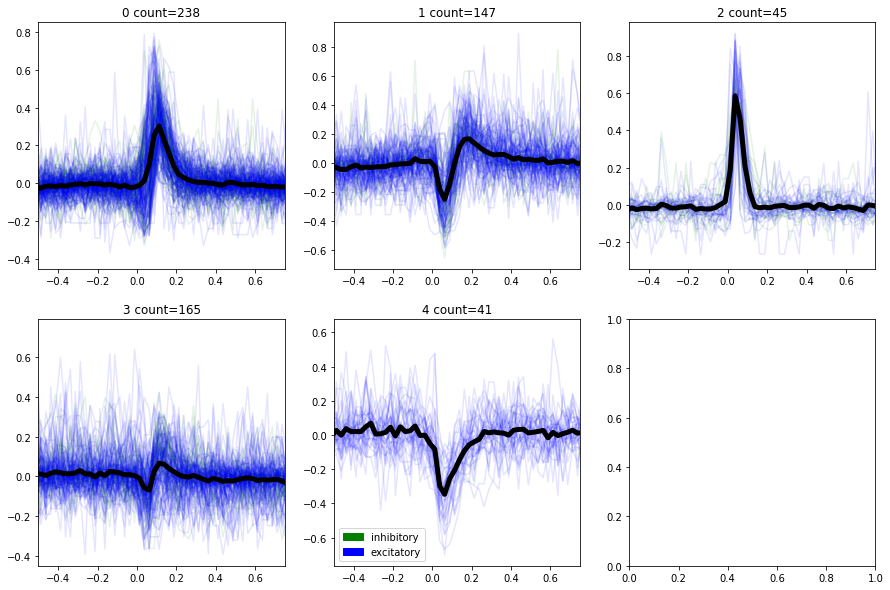

In [10]:
print('plotting clusters')
trange = np.arange(-1,1.1,0.025)
plt.subplots(2,3, figsize=(15,10))
count = 1
mean_cluster = dict()
for label in range(5):
    plt.subplot(2,3,count)
    plt.title(str(label)+' count='+str(len(df1['norm_deflection_at_pref_direction'][df1['gauss_clust']==label].dropna())))
    inhibitory_nested = df1['norm_deflection_at_pref_direction'][df1['gauss_clust']==label][df1['waveform_km_label']==0].ravel()
    sz1 = (np.size(inhibitory_nested, 0) if type(inhibitory_nested) != np.float else 0)
    for i in range(sz1):
        temp_sz0 = (len(inhibitory_nested[i]) if type(inhibitory_nested[i]) != np.float else 0)
        if temp_sz0 > 0:
            sz0 = temp_sz0
    if sz0 > 0 and sz1 > 0:
        inhibitory = np.zeros([sz1,sz0])
        for i in range(sz1):
            inhibitory[i,:] = inhibitory_nested[i]
        plt.plot(0.5*(trange[0:-1] + trange[1:]), inhibitory.T, 'g', alpha=0.1)
    else:
        inhibitory = np.nan
    excitatory_nested = df1['norm_deflection_at_pref_direction'][df1['gauss_clust']==label][df1['waveform_km_label']==1].ravel()
    sz1 = (np.size(excitatory_nested, 0) if type(excitatory_nested) != np.float else 0)
    for i in range(sz1):
        temp_sz0 = (len(excitatory_nested[i]) if type(excitatory_nested[i]) != np.float else 0)
        if temp_sz0 > 0:
            sz0 = temp_sz0
    if sz0 > 0 and sz1 > 0:
        excitatory = np.zeros([sz1,sz0])
        for i in range(sz1):
            excitatory[i,:] = excitatory_nested[i]
        plt.plot(0.5*(trange[0:-1] + trange[1:]), excitatory.T, 'b', alpha=0.1)
    else:
        excitatory = np.nan
    if type(inhibitory) != float or type(excitatory) != float:
        if type(inhibitory) != float and type(excitatory) != float:
            all_units = np.nanmean(np.concatenate([inhibitory, excitatory], axis=0), axis=0)
        elif type(inhibitory) != float and type(excitatory) == float:
            all_units = np.nanmean(inhibitory, axis=0)
        elif type(inhibitory) == float and type(excitatory) != float:
            all_units = np.nanmean(excitatory, axis=0)
        mean_cluster[label] = all_units
        plt.plot(0.5*(trange[0:-1] + trange[1:]), all_units, 'k', linewidth=5)
    else:
        mean_cluster[label] = np.nan
    count += 1
    plt.xlim([-0.5,0.75])
plt.legend(handles=[bluepatch, greenpatch])
plt.show()

In [11]:
print('relabeling based on peak finding')
cluster_to_cell_type = dict()
for cluster_num, orig_cluster in mean_cluster.items():
    cluster = flatten_series(df1['norm_deflection_at_pref_direction'][df1['gauss_clust']==cluster_num])
    cluster_mean = np.nanmean(cluster, 0)
    baseline = np.nanmean(cluster_mean[:30])
    p, t = get_peak_trough(cluster_mean[38:50], baseline)
    cluster_to_cell_type[cluster_num] = get_cluster_props(p, t)

relabeling based on peak finding


In [12]:
cluster_to_cell_type

{0: 'late', 1: 'biphasic', 2: 'early', 3: 'unresponsive', 4: 'negative'}

In [13]:
from sklearn.cluster import KMeans

In [14]:
for ind, row in df1.iterrows():
    df1.at[ind, 'movement_psth_type_simple'] = cluster_to_cell_type[row['gauss_clust']]

In [215]:
early = flatten_series(df1['norm_deflection_at_opp_direction_comp'][df1['movement_psth_type_simple']=='early'])
early_cluster_km_labels = KMeans(n_clusters=2).fit(early).labels_

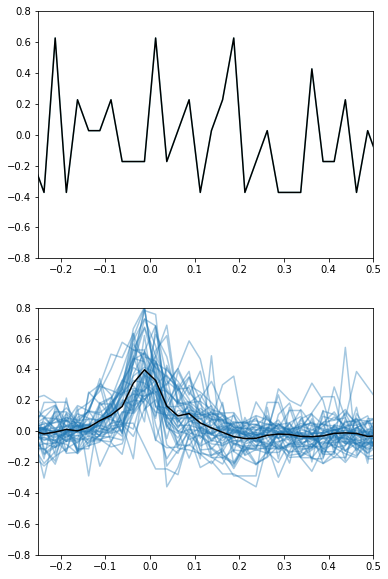

In [216]:
early0mean = np.nanmean(early[early_cluster_km_labels==0], 0)
early1mean = np.nanmean(early[early_cluster_km_labels==1], 0)
comp_responsive_early_cluster = np.argmax([(np.max(np.abs(early0mean))-np.mean(early0mean)) / np.std(early0mean), (np.max(np.abs(early1mean))-np.mean(early1mean)) / np.std(early1mean)])
trange = np.arange(-1,1.1,0.025)
plt.subplots(2,1,figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(0.5*(trange[0:-1] + trange[1:]), early[early_cluster_km_labels==0].T, 'tab:cyan', alpha=0.4)
plt.ylim([-0.8,0.8]); plt.xlim([-0.25,0.5])
plt.plot(0.5*(trange[0:-1] + trange[1:]), early0mean, 'k')
plt.subplot(2,1,2)
plt.plot(0.5*(trange[0:-1] + trange[1:]), early[early_cluster_km_labels==1].T, 'tab:blue', alpha=0.4)
plt.ylim([-0.8,0.8]); plt.xlim([-0.25,0.5])
plt.plot(0.5*(trange[0:-1] + trange[1:]), early1mean, 'k')

In [17]:
early_inds = df1['norm_deflection_at_pref_direction_comp'][df1['movement_psth_type_simple']=='early'].index.values

In [18]:
for i in range(np.size(early, 0)):
    real_ind = early_inds[i]
    df1.at[real_ind, 'early_comp_responsive'] = (True if early_cluster_km_labels[i]==comp_responsive_early_cluster else False)

In [19]:
for ind, row in df1.iterrows():
    if row['movement_psth_type_simple'] == 'late':
        df1.at[ind, 'movement_psth_type'] = 'late positive'
    elif row['movement_psth_type_simple'] != 'early':
        df1.at[ind, 'movement_psth_type'] = row['movement_psth_type_simple']
    elif row['movement_psth_type_simple'] == 'early':
        if row['early_comp_responsive']:
            df1.at[ind, 'movement_psth_type'] = 'early positive and compensatory responsive'
        elif not row['early_comp_responsive']:
            df1.at[ind, 'movement_psth_type'] = 'early positive'

plotting clusters


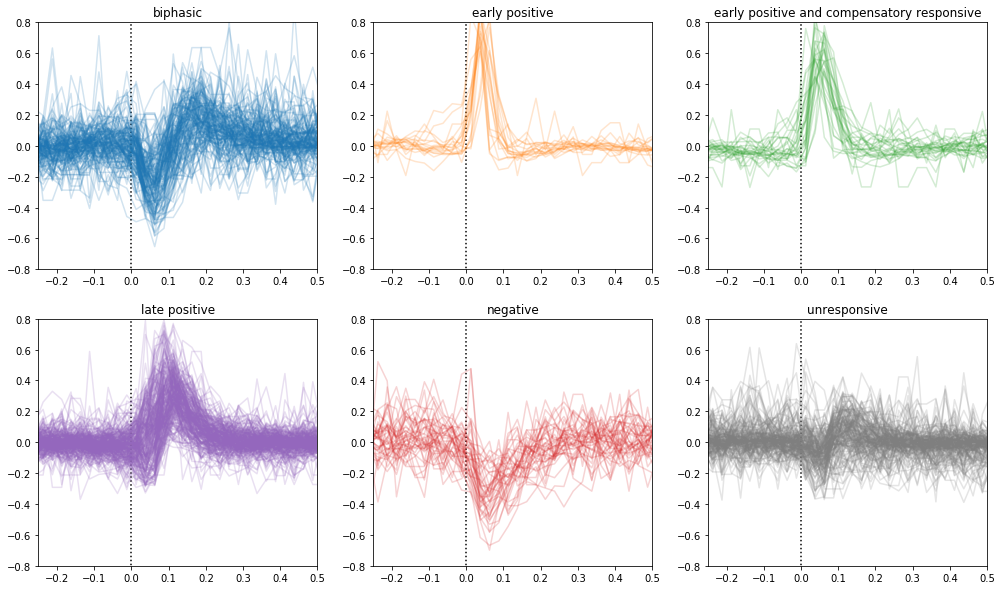

In [20]:
print('plotting clusters')
plt.subplots(2,3, figsize=(17,10))
trange = np.arange(-1,1.1,0.025)
labels = sorted(df1['movement_psth_type'].unique())
for count, label in enumerate(labels):
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplot(2,3,count+1)
    for ind, row in cluster.iterrows():
        plt.plot(0.5*(trange[0:-1] + trange[1:]), row['norm_deflection_at_pref_direction'], color=tempcolor, alpha=0.2)
    plt.xlim([-0.25,0.5])
    plt.title(label)
    plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
    plt.ylim([-0.8,0.8])
plt.show()

In [25]:
print('plotting clusters when compensatory')
plt.subplots(2,3, figsize=(15,10))
trange = np.arange(-1,1.1,0.025)
labels = sorted(df1['movement_psth_type'].unique())
for count, label in enumerate(labels):
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplot(2,3,count+1)
    for ind, row in cluster.iterrows():
        plt.plot(0.5*(trange[0:-1] + trange[1:]), row['norm_deflection_at_pref_direction_comp'], color=tempcolor, alpha=0.2)
    plt.xlim([-0.25,0.5])
    plt.title(label+' -- comp')
    plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
    plt.ylim([-0.8,0.8])
plt.show()
plt.figure(figsize=(10,8))
for count, label in enumerate(labels):
    cluster = flatten_series(df1['norm_deflection_at_pref_direction'][df1['movement_psth_type']==label])
    cluster_mean = np.nanmean(cluster, 0)
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    plt.plot(0.5*(trange[0:-1] + trange[1:]), cluster_mean, color=tempcolor, label=label, linewidth=5)
    plt.legend()
    plt.xlim([-0.25,0.5])
    plt.vlines(0,-0.5,0.5,linestyles='dotted',colors='k')
#     plt.ylim([-0.35,0.35])
plt.subplots(2,3, figsize=(15,10))
for count, label in enumerate(labels):
    plt.subplot(2,3,count+1)
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    plt.hist(df1['hf1_wn_depth_from_layer5'][df1['movement_psth_type']==label],bins=list(np.arange(-650,650+100,100)),orientation='horizontal',color=tempcolor)
    plt.title(label)
    plt.gca().invert_yaxis()
plt.show()

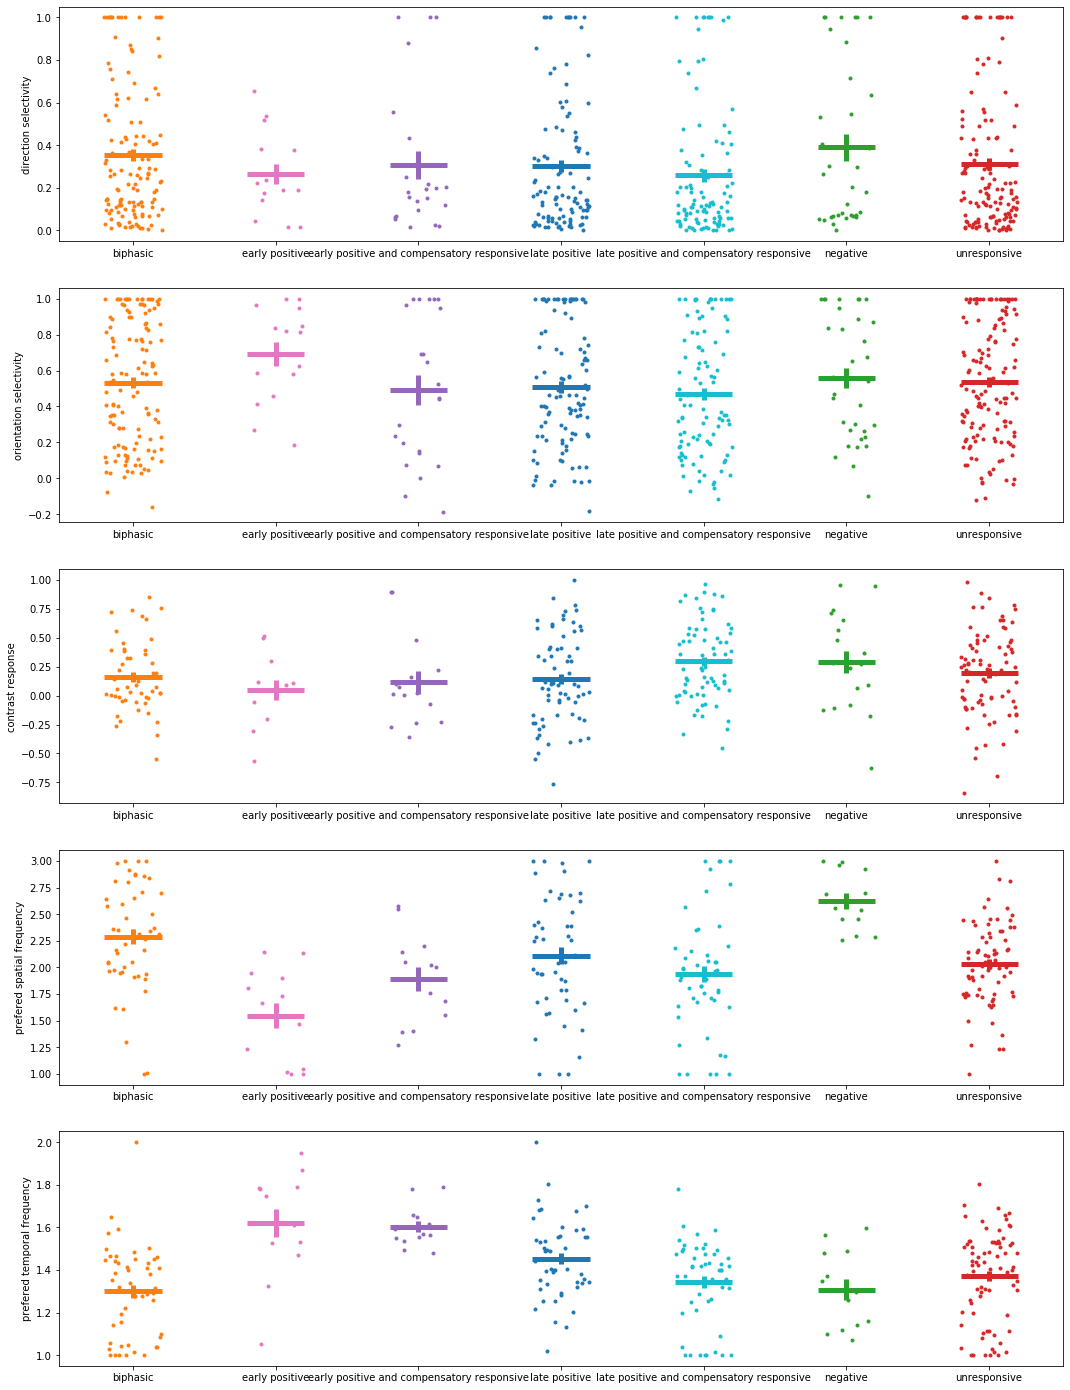

In [27]:
props = ['dsi_for_sf_pref', 'osi_for_sf_pref', 'hf1_wn_crf_modind', 'sf_pref', 'tf_pref']
prop_labels = ['direction selectivity','orientation selectivity','contrast response','prefered spatial frequency','prefered temporal frequency']
plt.subplots(5,1,figsize=(18,25))
for fig_count, prop in enumerate(props):
    ax = plt.subplot(5,1,fig_count+1)
    for label_count, label in enumerate(labels):
        if prop=='sf_pref' or prop=='tf_pref':
            s = df1[prop][df1['responsive_to_gratings']][df1['movement_psth_type']==label].dropna()
        else:
            s = df1[prop][df1['movement_psth_type']==label].dropna()
        s_mean = np.nanmean(s)
        stderr = np.nanstd(s) / np.sqrt(np.size(s,0))
        lbound = label_count-0.2; ubound = label_count+0.2
        x_jitter = np.random.uniform(lbound, ubound, np.size(s,0))
        tempcolor = ['tab:orange','tab:pink','tab:purple','tab:blue', 'tab:cyan', 'tab:green', 'tab:red'][label_count]
        plt.plot(x_jitter, np.array(s), '.', color=tempcolor)
        plt.hlines(s_mean, lbound, ubound, color=tempcolor, linewidth=5)
        plt.vlines(label_count, s_mean-stderr, s_mean+stderr, color=tempcolor, linewidth=5)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    plt.ylabel(prop_labels[fig_count])
plt.show()

plotting clusters when compensatory


IndexError: list index out of range

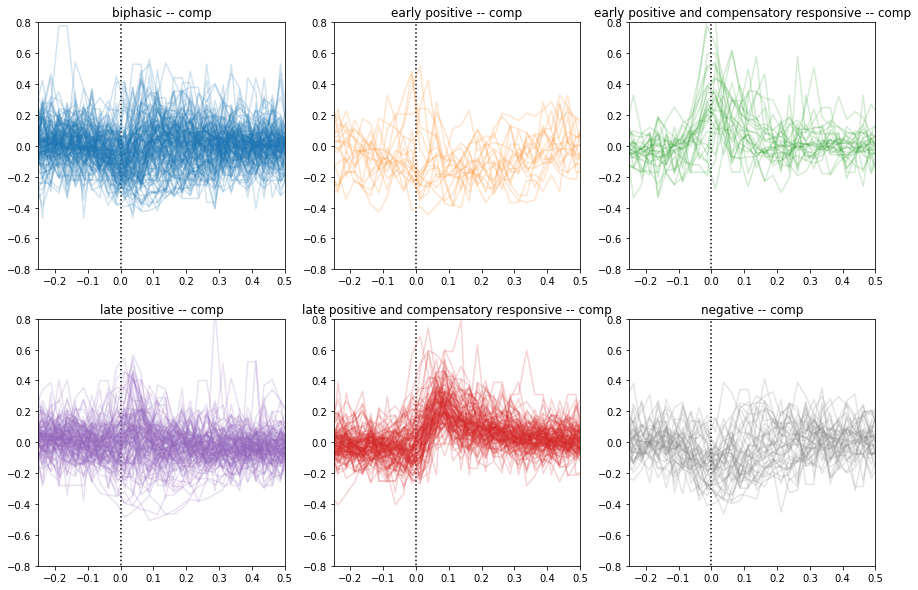

In [25]:
for ind, row in df1.iterrows():
    ori_tuning = np.mean(row['hf3_gratings_ori_tuning'],2) # [orientation, sf, tf]
    drift_spont = row['hf3_gratings_drift_spont']
    tuning = ori_tuning - drift_spont # subtract off spont rate
    tuning[tuning < 0] = 0 # set to 0 when tuning goes negative (i.e. when firing rate is below spontanious rate)
    th_pref = np.nanargmax(tuning,0) # get position of highest firing rate
    prefered_direction = np.zeros(3)
    prefered_orientation = np.zeros(3)
    best_tuning_for_sf = np.zeros(3)
    for sf in range(3):
        R_pref = (tuning[th_pref[sf], sf] + (tuning[(th_pref[sf]+4)%8, sf])) * 0.5 # get that firing rate (avg between peaks)
        th_ortho = (th_pref[sf]+2)%8 # get ortho position
        R_ortho = (tuning[th_ortho, sf] + (tuning[(th_ortho+4)%8, sf])) * 0.5  # ortho firing rate (average between two peaks)
        th_null = (th_pref[sf]+4)%8 # get other direction of same orientation
        R_null = tuning[th_null, sf] # tuning value at that peak
        prefered_direction[sf] = (np.arange(8)*45)[th_null]
        prefered_orientation[sf] = (np.arange(8)*45)[th_pref[sf]]
        best_tuning_for_sf[sf] = R_pref
    best_sf_ind = np.argmax(best_tuning_for_sf)
    df1.at[ind, 'best_direction'] = prefered_direction[best_sf_ind]
    df1.at[ind, 'best_orientation'] = prefered_orientation[best_sf_ind]
plt.subplots(4,2, figsize=(10,9))
plt.subplot(4,2,1)
plt.hist(df1['best_orientation'], bins=8, density=True, color='tab:gray')
plt.title('all')
for count, label in enumerate(labels):
    plt.subplot(4,2,count+2)
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    plt.hist(df1['best_orientation'][df1['movement_psth_type']==label], bins=8, density=True, color=tempcolor)
    plt.title(label +' count='+str(len(df1['best_orientation'][df1['movement_psth_type']==label])))
plt.subplot(4,2,8)
plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
def gratings_polar_plot(df, attr, labels, num_bins=8):
    fig = plt.subplots(3,int(np.ceil((len(labels)+1)/3)),figsize=(15,15))
    ax = plt.subplot(3,int(np.ceil((len(labels)+1)/3)),1,projection='polar')
    s = df[attr]
    ax.bar(np.linspace(0,(2*np.pi)-np.deg2rad(45),8), np.histogram(s, bins=8)[0], width=(2*np.pi)/8, bottom=0, alpha=0.5, color='tab:gray')
    plt.title('all')
    for count, label in enumerate(labels):
        s = df[attr][df['movement_psth_type']==label][df['responsive_to_gratings']]
        tempcolor = ['tab:orange','tab:pink','tab:purple','tab:blue', 'tab:cyan', 'tab:green', 'tab:red'][count]
        ax = plt.subplot(3,int(np.ceil((len(labels)+1)/3)),count+2,projection='polar')
        ax.bar(np.linspace(0,(2*np.pi)-np.deg2rad(45),8), np.histogram(s, bins=8)[0], width=(2*np.pi)/8, bottom=0, alpha=0.5, color=tempcolor)
        plt.title(label+' (cells='+str(len(s))+')')
    for i in range(count+3,(3*int(np.ceil((len(labels)+1)/3)))+1):
        plt.subplot(3,int(np.ceil((len(labels)+1)/3)),i)
        plt.axis('off')
    plt.tight_layout()
    return fig

<Figure size 432x288 with 0 Axes>

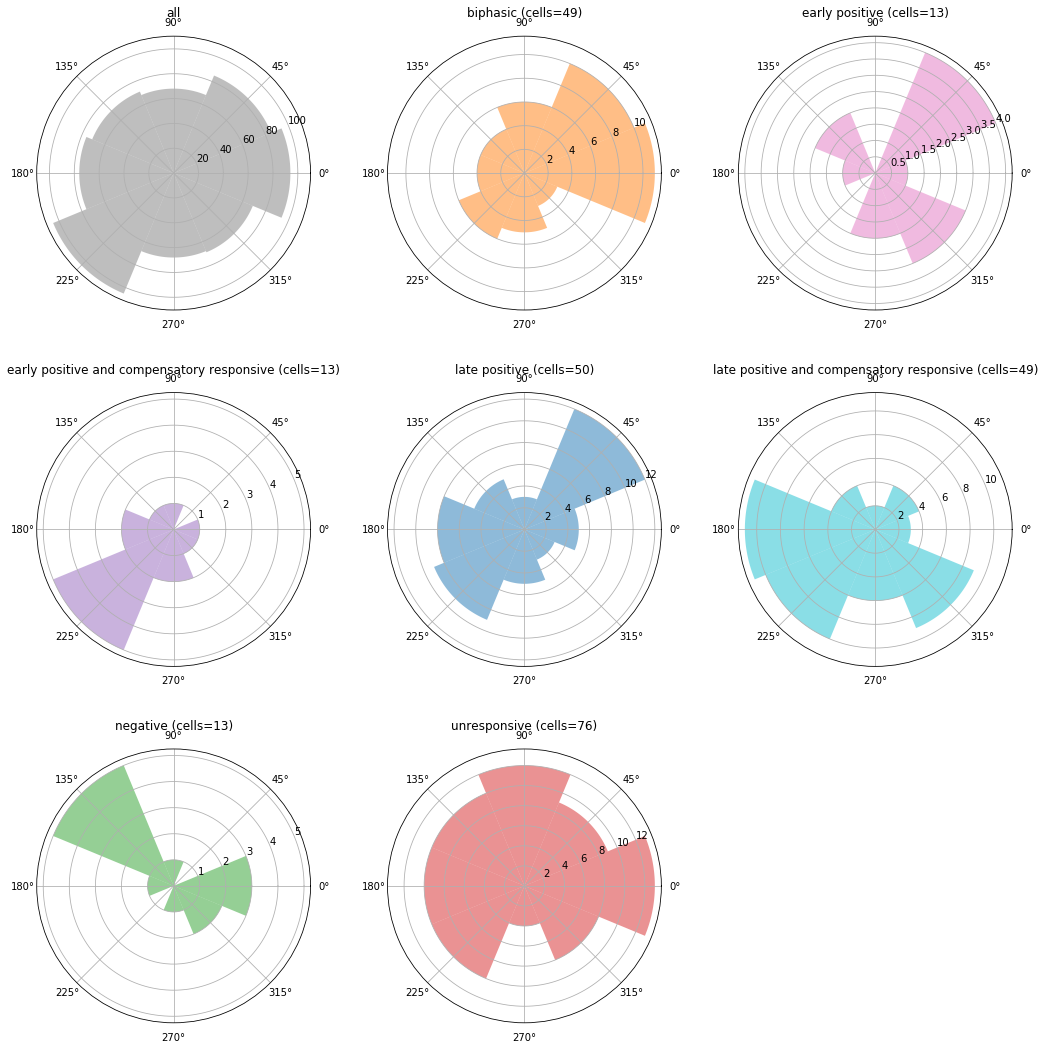

In [9]:
plt.figure()
labels = sorted(df1['movement_psth_type'].unique())
gratings_polar_plot(df1,'best_orientation',labels)
plt.show()

In [11]:
clust_num_resp_grat = []
clust_num = []
for count, label in enumerate(labels):
    cluster = df1[df1['movement_psth_type']==label]
    clust_num_resp_grat.append(np.sum(cluster['responsive_to_gratings']))
    clust_num.append(len(cluster))

array([0, 1, 2, 3, 4, 5, 6, 7])

Text(0, 0.5, 'num cells')

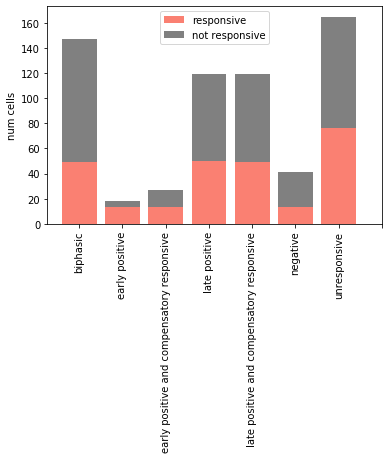

In [24]:
unresp = [clust_num[i]-clust_num_resp_grat[i] for i in range(len(clust_num))]
fig, ax = plt.subplots(1,1)
plt.bar(np.arange(0, len(labels)), clust_num_resp_grat, color='salmon', label='responsive')
plt.bar(np.arange(0, len(labels)), unresp, bottom=clust_num_resp_grat, color='gray', label='not responsive')
ax.set_xticks(np.arange(len(labels)+1))
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.ylabel('num cells')

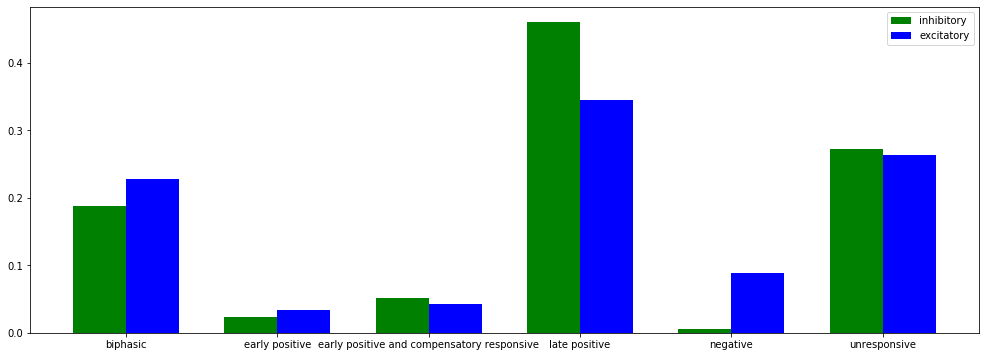

In [25]:
key_data = np.zeros([len(labels),2])
label_count = 0
for label in labels:
    num_inh = len(df1[df1['movement_psth_type']==label][df1['waveform_km_label']==0])
    num_exc = len(df1[df1['movement_psth_type']==label][df1['waveform_km_label']==1])
    if num_inh > 0:
        key_data[label_count, 0] = num_inh / len(df1[df1['waveform_km_label']==0])
    if num_exc > 0:
        key_data[label_count, 1] = num_exc / len(df1[df1['waveform_km_label']==1])
    label_count += 1
fig, ax = plt.subplots(1,1, figsize=(17,6))
x = np.arange(len(labels))
width = 0.35
plt.bar(x - width/2, key_data[:,0], width=width, label='inhibitory', color='g')
plt.bar(x + width/2, key_data[:,1], width=width, label='excitatory', color='b')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [26]:
df1['has_dark'] = ~pd.isnull(df1['dark_gaze_shift_using_light_direction_pref'])

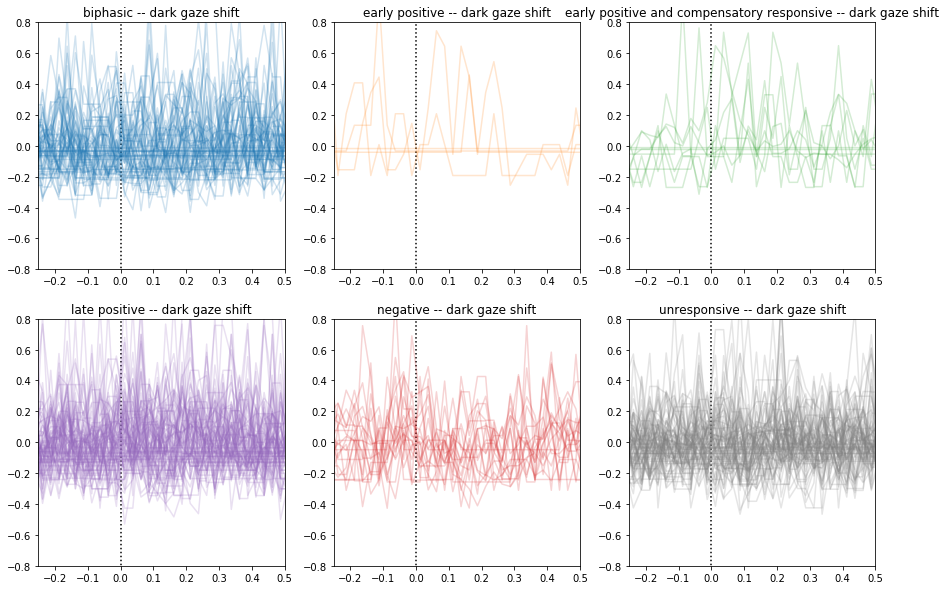

In [27]:
plt.subplots(2,3, figsize=(15,10))
trange = np.arange(-1,1.1,0.025)
labels = sorted(df1['movement_psth_type'].unique())
for count, label in enumerate(labels):
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplot(2,3,count+1)
    for ind, row in cluster.iterrows():
        if row['has_dark']:
            plt.plot(0.5*(trange[0:-1] + trange[1:]), row['dark_gaze_shift_using_light_direction_pref'], color=tempcolor, alpha=0.2)
    plt.xlim([-0.25,0.5])
    plt.title(label+' -- dark gaze shift')
    plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
    plt.ylim([-0.8,0.8])
plt.show()

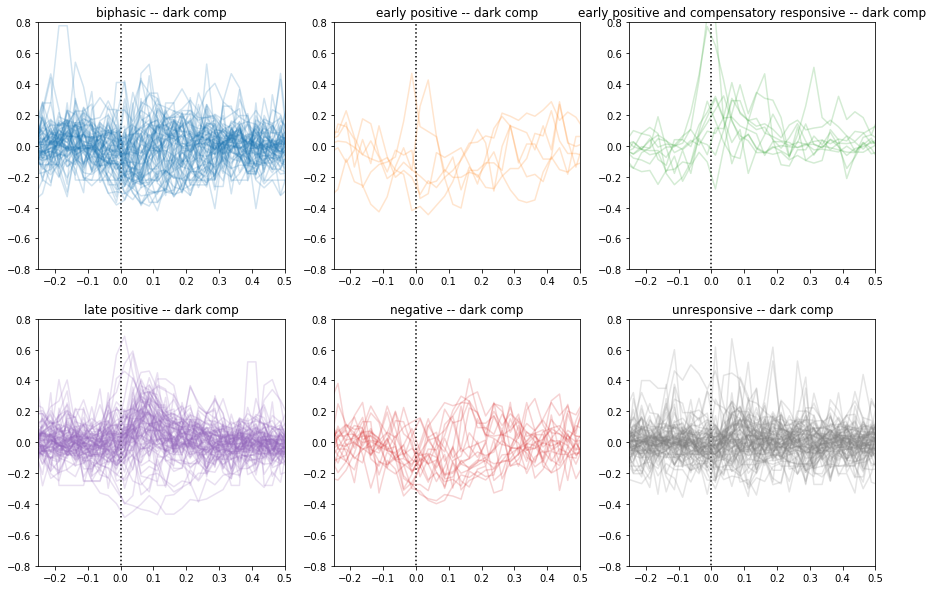

In [28]:
plt.subplots(2,3, figsize=(15,10))
trange = np.arange(-1,1.1,0.025)
labels = sorted(df1['movement_psth_type'].unique())
for count, label in enumerate(labels):
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray'][count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplot(2,3,count+1)
    for ind, row in cluster.iterrows():
        if row['has_dark']:
            plt.plot(0.5*(trange[0:-1] + trange[1:]), row['dark_comp_using_light_direction_pref'], color=tempcolor, alpha=0.2)
    plt.xlim([-0.25,0.5])
    plt.title(label+' -- dark comp')
    plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
    plt.ylim([-0.8,0.8])
plt.show()

In [229]:
[col for col in df1.columns.values if 'modind' in col and 'fm' in col]

['fm1_spike_rate_vs_gz_modind_neg',
 'fm1_spike_rate_vs_gz_modind_pos',
 'fm1_spike_rate_vs_gx_modind_neg',
 'fm1_spike_rate_vs_gx_modind_pos',
 'fm1_spike_rate_vs_gy_modind_neg',
 'fm1_spike_rate_vs_gy_modind_pos',
 'fm1_upsacc_avg_gaze_shift_dEye_modind_t0',
 'fm1_downsacc_avg_gaze_shift_dEye_modind_t0',
 'fm1_upsacc_avg_gaze_shift_dEye_modind_t100',
 'fm1_downsacc_avg_gaze_shift_dEye_modind_t100',
 'fm1_upsacc_avg_comp_dEye_modind_t0',
 'fm1_downsacc_avg_comp_dEye_modind_t0',
 'fm1_upsacc_avg_comp_dEye_modind_t100',
 'fm1_downsacc_avg_comp_dEye_modind_t100',
 'fm1_upsacc_avg_gaze_shift_dHead_modind_t0',
 'fm1_downsacc_avg_gaze_shift_dHead_modind_t0',
 'fm1_upsacc_avg_gaze_shift_dHead_modind_t100',
 'fm1_downsacc_avg_gaze_shift_dHead_modind_t100',
 'fm1_upsacc_avg_comp_dHead_modind_t0',
 'fm1_downsacc_avg_comp_dHead_modind_t0',
 'fm1_upsacc_avg_comp_dHead_modind_t100',
 'fm1_downsacc_avg_comp_dHead_modind_t100',
 'fm1_upsacc_modind_t0',
 'fm1_downsacc_modind_t0',
 'fm1_upsacc_modind_

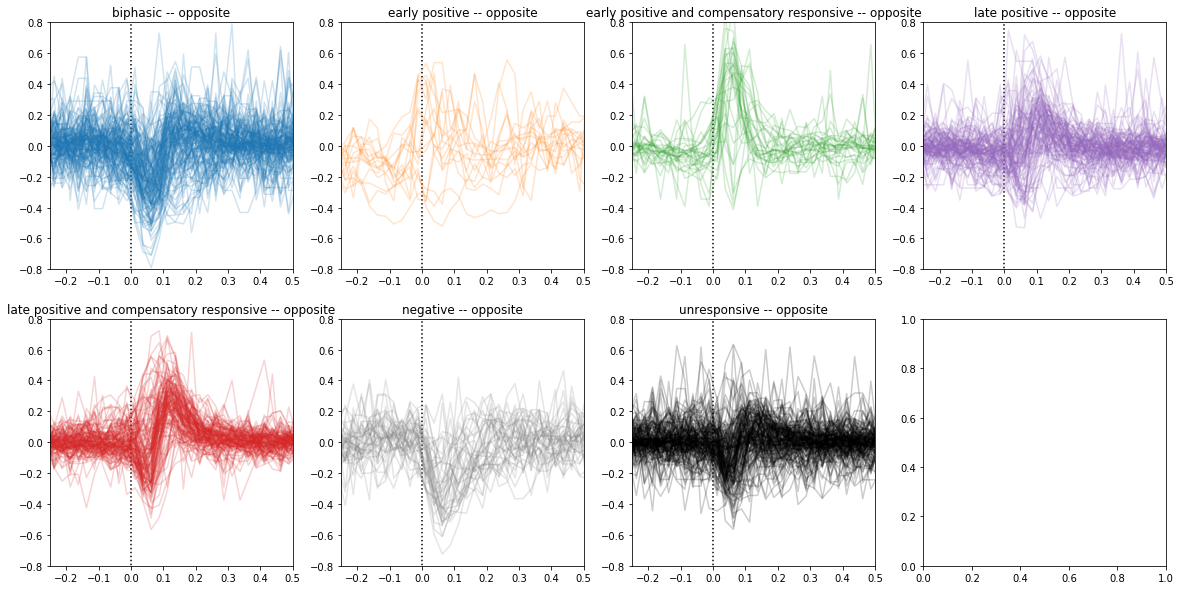

In [222]:
plt.subplots(2,4, figsize=(20,10))
trange = np.arange(-1,1.1,0.025)
labels = sorted(df1['movement_psth_type'].unique())
for count, label in enumerate(labels):
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray', 'k'][count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplot(2,4,count+1)
    for ind, row in cluster.iterrows():
        plt.plot(0.5*(trange[0:-1] + trange[1:]), row['norm_deflection_at_opp_direction'], color=tempcolor, alpha=0.2)
    plt.xlim([-0.25,0.5])
    plt.title(label+' -- opposite')
    plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
    plt.ylim([-0.8,0.8])
plt.show()

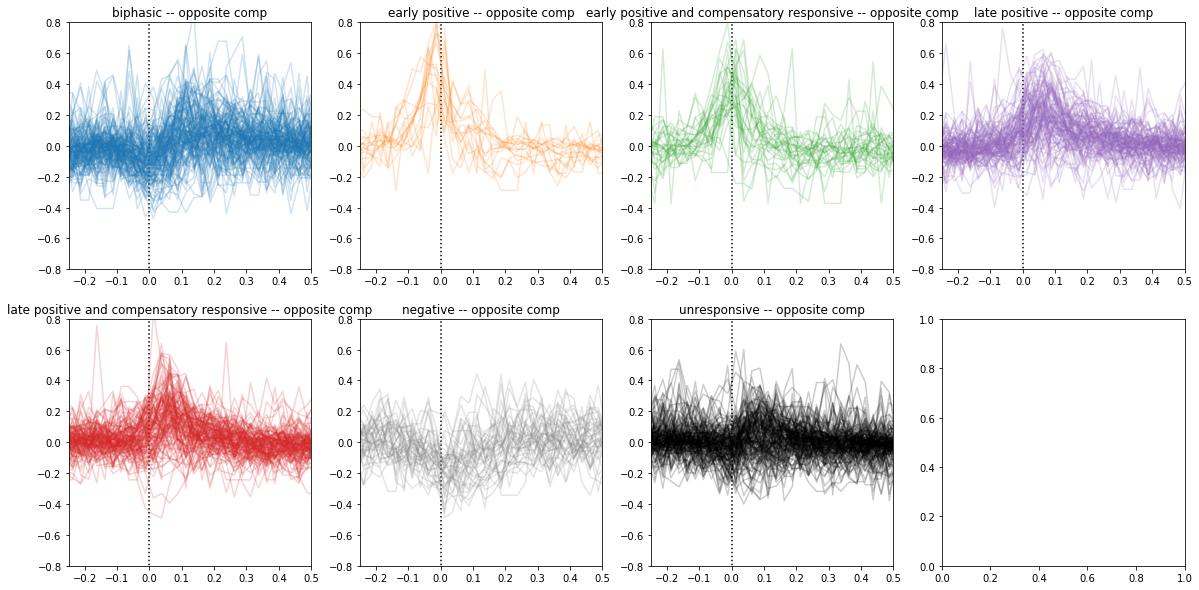

In [223]:
plt.subplots(2,4, figsize=(20,10))
trange = np.arange(-1,1.1,0.025)
labels = sorted(df1['movement_psth_type'].unique())
for count, label in enumerate(labels):
    tempcolor = ['tab:blue','tab:orange','tab:green','tab:purple', 'tab:red', 'tab:gray', 'k'][count]
    cluster = df1[df1['movement_psth_type']==label]
    plt.subplot(2,4,count+1)
    for ind, row in cluster.iterrows():
        plt.plot(0.5*(trange[0:-1] + trange[1:]), row['norm_deflection_at_opp_direction_comp'], color=tempcolor, alpha=0.2)
    plt.xlim([-0.25,0.5])
    plt.title(label+' -- opposite comp')
    plt.vlines(0, -1, 1, linestyles='dotted', colors='k')
    plt.ylim([-0.8,0.8])
plt.show()

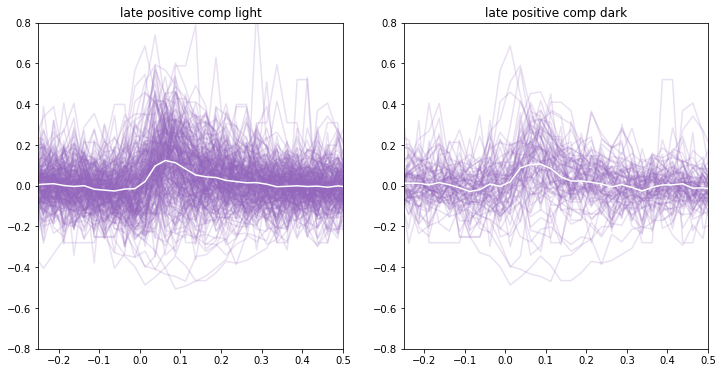

In [29]:
plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
plt.title('late positive comp light'); plt.xlim([-0.25,0.5]); plt.ylim([-0.8,0.8])
for ind, row in df1['norm_deflection_at_pref_direction_comp'][df1['movement_psth_type']=='late positive'].iteritems():
    plt.plot(0.5*(trange[0:-1] + trange[1:]), row, color='tab:purple', alpha=0.2)
plt.plot(0.5*(trange[0:-1] + trange[1:]), np.mean(flatten_series(df1['norm_deflection_at_pref_direction_comp'][df1['movement_psth_type']=='late positive']),0),'w')
plt.subplot(1,2,2)
plt.title('late positive comp dark'); plt.xlim([-0.25,0.5]); plt.ylim([-0.8,0.8])
for ind, row in df1['dark_comp_using_light_direction_pref'][df1['movement_psth_type']=='late positive'][df1['has_dark']].iteritems():
    plt.plot(0.5*(trange[0:-1] + trange[1:]), row, color='tab:purple', alpha=0.2)
plt.plot(0.5*(trange[0:-1] + trange[1:]), np.mean(flatten_series(df1['dark_comp_using_light_direction_pref'][df1['movement_psth_type']=='late positive'][df1['has_dark']]),0),'w')

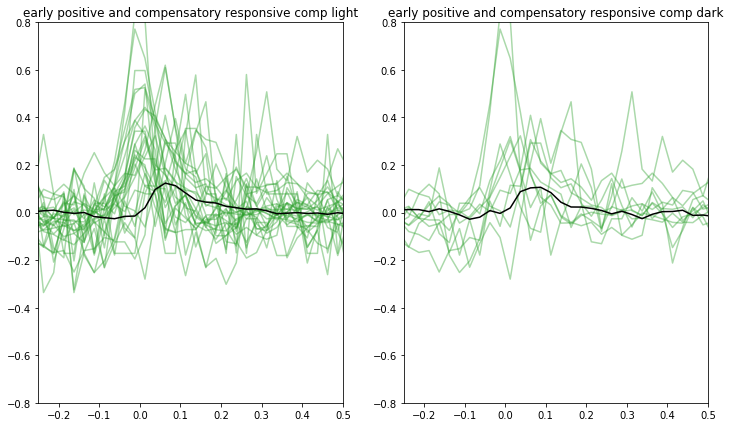

In [30]:
plt.subplots(1,2,figsize=(12,7))
plt.subplot(1,2,1)
plt.title('early positive and compensatory responsive comp light'); plt.xlim([-0.25,0.5]); plt.ylim([-0.8,0.8])
for ind, row in df1['norm_deflection_at_pref_direction_comp'][df1['movement_psth_type']=='early positive and compensatory responsive'].iteritems():
    plt.plot(0.5*(trange[0:-1] + trange[1:]), row, color='tab:green', alpha=0.4)
plt.plot(0.5*(trange[0:-1] + trange[1:]), np.mean(flatten_series(df1['norm_deflection_at_pref_direction_comp'][df1['movement_psth_type']=='late positive']),0),'k')
plt.subplot(1,2,2)
plt.title('early positive and compensatory responsive comp dark'); plt.xlim([-0.25,0.5]); plt.ylim([-0.8,0.8])
for ind, row in df1['dark_comp_using_light_direction_pref'][df1['movement_psth_type']=='early positive and compensatory responsive'][df1['has_dark']].iteritems():
    plt.plot(0.5*(trange[0:-1] + trange[1:]), row, color='tab:green', alpha=0.4)
plt.plot(0.5*(trange[0:-1] + trange[1:]), np.mean(flatten_series(df1['dark_comp_using_light_direction_pref'][df1['movement_psth_type']=='late positive'][df1['has_dark']]),0),'k')